## Arby's Sales Analysis and Forecasting

Name: Shreyas Kulkarni <br>
Email : shreyaskulkarni20@gmail.com

#### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error # Packages for measuring model performance / errors
from keras.models import Sequential # Deep learning library, used for neural networks
from keras.layers import LSTM, Dense, Dropout # Deep learning classes for recurrent and regular densely-connected layers
from keras.callbacks import EarlyStopping # EarlyStopping during model training
from sklearn.preprocessing import RobustScaler, MinMaxScaler # This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
import sys
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib.pyplot import figure
import statsmodels.api as sm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from dateutil.relativedelta import relativedelta


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Data Preparation

#### Importing the data

In [3]:
media=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\case_study_media_data.csv')
restaurant=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\restaurant.csv')
print_info=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\store print info.csv')
Competitive=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\Competitive Data.csv')
weather_2015=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\weather_2015.csv')
weather_2016=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\weather_2016.csv')
weather_2017=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\weather_2017.csv')
weather_2018=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\weather_2018.csv')
sales15_16=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\arg_sales_2015_2016.csv')
sales17_18=pd.read_csv('C:\\Users\\shrey\\OneDrive\\Documents\\inspire\\OneDrive_2022-04-11\\Hiring Case Study\\arg_sales_2017_2018.csv')

C:\Users\shrey\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Getting sense of the information in all the dataframes

In [4]:
print("Media:")
display(media.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Restaurant details:")
display(restaurant.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Print information:")
display(print_info.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Competition in the proximity:")
display(Competitive.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Weather in 2015:")
display(weather_2015.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Weather in 2016:")
display(weather_2016.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Weather in 2017:")
display(weather_2017.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Weather in 2018:")
display(weather_2018.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Daily sales in calander year 2015 and 2016:")
display(sales15_16.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")
print("Daily sales in calander year 2017 and 2018:")
display(sales17_18.head(5))
print("-------------------------------------------------------------------------------------------------------------------------------")
print("-------------------------------------------------------------------------------------------------------------------------------")

Media:


rest_dma_code  fiscal_year  fiscal_week_number  OnAir_TY  Equal_TRPS_CM_TY
0            501         2015                   1         0               0.0
1            501         2015                   2         0               0.0
2            501         2015                   3         0               0.0
3            501         2015                   4         0               0.0
4            501         2015                   5         0               0.0

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Restaurant details:


REST_NUMBER REST_STATUS REST_ADDRSTATE  REST_REMODELDT REST_OPENDATE  \
0        776.0        Open             IN        17530101     6/14/1976   
1        791.0        Open             NC        20081209     3/15/1977   
2        808.0        Open             CA        20181006    11/29/1975   
3        822.0        Open             NE        20180517     2/16/1976   
4        841.0        Open             FL        19990301     1/14/1978   

  REST_CLOSEDATE  
0     1753-01-01  
1     1753-01-01  
2     1753-01-01  
3     1753-01-01  
4     1753-01-01

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Print information:


rest_number  drop_date  fiscal_year  fiscal_week_number
0           10  3/24/2015         2015                  13
1            1  3/24/2015         2015                  13
2           86  3/24/2015         2015                  13
3          228  9/29/2015         2015                  40
4           85  3/24/2015         2015                  13

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Competition in the proximity:


Store #  # of McDonalds <1 mi  # of Subway <1 mi  # of Wendys <1 mi  \
0     5938                     0                  0                  0   
1     6394                     0                  0                  1   
2     7724                     1                  2                  0   
3     6204                     1                  1                  1   
4     6830                     1                  2                  1   

   # of Burger King <1 mi  # of Taco Bell <1 mi  # of McDonalds <0.5 mi  \
0                       0                     0                       0   
1                       1                     0                       0   
2                       0                     0                       1   
3                       1                     1                       0   
4                       1                     1                       1   

   # of Subway <0.5 mi  # of Wendys <0.5 mi  # of Burger King <0.5 mi  \
0                    0                    0                         0   
1                    0                    1                         1   
2                    2                    0                         0   
3                    1                    0                         1   
4                    1                    1                         1   

   # of Taco Bell <0.5 mi  
0                       0  
1                       0  
2                       0  
3                       0  
4                       1

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Weather in 2015:


rest_number  rest_dma_code                   rest_dma_desc    Date_TY  \
0            1            536  YOUNGSTOWN                       2/2/2015   
1            1            536  YOUNGSTOWN                       5/8/2015   
2            1            536  YOUNGSTOWN                       2/9/2015   
3            1            536  YOUNGSTOWN                       3/7/2015   
4            1            536  YOUNGSTOWN                      2/10/2015   

    Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket Snow_bucket  \
0  22.858571     38.93     13.73                 NaN    moderate         NaN   
1  77.630000     83.93     62.33                 NaN         NaN         NaN   
2  25.430000     26.33     24.53                 NaN        mild         NaN   
3  26.844285     35.33     17.33                 NaN         NaN        mild   
4  22.344285     28.13     17.33                 NaN         NaN        mild   

   snow  thunderstorm  rain  clear_weather  
0     0             0     1              0  
1     0             0     0              1  
2     0             0     1              0  
3     1             0     0              1  
4     1             0     0              1

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Weather in 2016:


rest_number  rest_dma_code                   rest_dma_desc   Date_TY  \
0            1            536  YOUNGSTOWN                      1/1/2016   
1            1            536  YOUNGSTOWN                      1/2/2016   
2            1            536  YOUNGSTOWN                      1/3/2016   
3            1            536  YOUNGSTOWN                      1/4/2016   
4            1            536  YOUNGSTOWN                      1/5/2016   

    Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket Snow_bucket  \
0  30.058571     33.53     26.33                 NaN         NaN        mild   
1  28.130000     33.53     24.53                 NaN         NaN        mild   
2  30.444285     33.53     28.13                 NaN         NaN        mild   
3  22.215714     28.13     11.93                 NaN         NaN    moderate   
4  16.558571     29.93      2.93                 NaN         NaN         NaN   

   snow  thunderstorm  rain  clear_weather  
0     1             0     0              0  
1     1             0     0              0  
2     1             0     0              1  
3     1             0     0              0  
4     0             0     0              1

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Weather in 2017:


rest_number  rest_dma_code                   rest_dma_desc    Date_TY  \
0            1            536  YOUNGSTOWN                      4/15/2017   
1            1            536  YOUNGSTOWN                       1/6/2017   
2            1            536  YOUNGSTOWN                       3/2/2017   
3            1            536  YOUNGSTOWN                       1/3/2017   
4            1            536  YOUNGSTOWN                      4/21/2017   

    Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket Snow_bucket  \
0  66.315714     78.53     46.13            moderate        mild         NaN   
1   9.358571     17.33     -0.67                 NaN         NaN        mild   
2  30.958571     37.13     24.53                 NaN        mild        mild   
3  44.201428     47.93     38.93                 NaN    moderate         NaN   
4  57.058571     64.13     47.93                 NaN         NaN         NaN   

   snow  thunderstorm  rain  clear_weather  
0     0             1     1              0  
1     1             0     0              1  
2     1             0     1              0  
3     0             0     1              0  
4     0             0     0              0

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Weather in 2018:


rest_number  rest_dma_code                   rest_dma_desc    Date_TY  \
0          1.0          536.0  YOUNGSTOWN                      1/14/2018   
1          1.0          536.0  YOUNGSTOWN                      3/26/2018   
2          1.0          536.0  YOUNGSTOWN                       3/7/2018   
3          1.0          536.0  YOUNGSTOWN                      5/11/2018   
4          1.0          536.0  YOUNGSTOWN                      2/24/2018   

    Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket Snow_bucket  \
0   9.872857     24.53     -9.67                 NaN         NaN         NaN   
1  42.015714     53.33     28.13                 NaN         NaN         NaN   
2  35.072857     40.73     29.93                 NaN        mild    moderate   
3  51.787142     58.73     42.53                 NaN        mild         NaN   
4  42.658571     47.93     37.13                 NaN    moderate         NaN   

   snow  thunderstorm  rain  clear_weather  
0   0.0           0.0   0.0            1.0  
1   0.0           0.0   0.0            1.0  
2   1.0           0.0   1.0            0.0  
3   0.0           0.0   1.0            0.0  
4   0.0           0.0   1.0            0.0

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Daily sales in calander year 2015 and 2016:


Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  Fiscal_Year  \
0            1            536  YOUNGSTOWN                             2015   
1            1            536  YOUNGSTOWN                             2015   
2            1            536  YOUNGSTOWN                             2015   
3            1            536  YOUNGSTOWN                             2015   
4            1            536  YOUNGSTOWN                             2015   

   Fiscal_Week_Number   Days_Date  Sales_TY  
0                   1  12/29/2014   2600.03  
1                   1  12/30/2014   2333.04  
2                   1  12/31/2014   2045.05  
3                   1    1/1/2015   1355.33  
4                   1    1/2/2015   2645.63

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Daily sales in calander year 2017 and 2018:


Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  Fiscal_Year  \
0            1            536  YOUNGSTOWN                             2017   
1            1            536  YOUNGSTOWN                             2017   
2            1            536  YOUNGSTOWN                             2017   
3            1            536  YOUNGSTOWN                             2017   
4            1            536  YOUNGSTOWN                             2017   

   Fiscal_Week_Number Days_Date  Sales_TY  
0                   1  1/2/2017   3119.95  
1                   1  1/3/2017   3676.76  
2                   1  1/4/2017   3949.02  
3                   1  1/5/2017   3012.36  
4                   1  1/6/2017   3948.25

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


So we can combine all the weather and sales information as managing data which is just divided by calendar year would be difficult

In [5]:
weather=[weather_2015,weather_2016,weather_2017,weather_2018]
weather_df = pd.concat(weather)
weather_df.sample(5)

rest_number  rest_dma_code                   rest_dma_desc    Date_TY  \
37761         705.0          573.0  ROANOKE-LYNCHBURG                4/1/2015   
403187          NaN            NaN                             NaN        NaN   
248922       8097.0          524.0  ATLANTA                          2/8/2017   
111920       1384.0          524.0  ATLANTA                         12/7/2015   
188433       5563.0          520.0  AUGUSTA                         11/5/2016   

         Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket  \
37761   54.230000     62.33     42.53                 NaN         NaN   
403187        NaN       NaN       NaN                 NaN         NaN   
248922  59.244285     69.53     47.93                 NaN    moderate   
111920  54.101428     65.93     38.93                 NaN         NaN   
188433  60.015714     73.13     42.53                 NaN         NaN   

       Snow_bucket  snow  thunderstorm  rain  clear_weather  
37761          NaN   0.0           0.0   0.0            1.0  
403187         NaN   NaN           NaN   NaN            NaN  
248922         NaN   0.0           0.0   1.0            0.0  
111920         NaN   0.0           0.0   0.0            1.0  
188433         NaN   0.0           0.0   0.0            1.0

In [6]:
sales=[sales15_16,sales17_18]
sales_df=pd.concat(sales)
sales_df.sample(5)

Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  \
646369         7549            563  GRAND RAPIDS-KALAMAZOO-BATT      
602611         7590            611  MASON CITY-AUSTIN-ROCHESTER      
772769         8201            507  SAVANNAH                         
189560         1220            524  ATLANTA                          
451919         6441            544  NORFOLK-PORTSMOUTH-NEWPORT       

        Fiscal_Year  Fiscal_Week_Number   Days_Date  Sales_TY  
646369         2018                  41  10/13/2018   2640.36  
602611         2016                   1    1/7/2016   2324.98  
772769         2018                  52  12/26/2018   2344.79  
189560         2016                   4   1/27/2016   3533.45  
451919         2018                  47  11/19/2018   2823.46

In [7]:
sales_df.dtypes

Rest_Number             int64
Rest_DMA_Code           int64
Rest_DMA_Desc          object
Fiscal_Year             int64
Fiscal_Week_Number      int64
Days_Date              object
Sales_TY              float64
dtype: object

Lets just summarize all the data we have

In [8]:
weather_df.columns

Index(['rest_number', 'rest_dma_code', 'rest_dma_desc', 'Date_TY', 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather'],
      dtype='object')

In [9]:
weather_df.dtypes

rest_number            float64
rest_dma_code          float64
rest_dma_desc           object
Date_TY                 object
Temp_Avg               float64
Temp_Max               float64
Temp_Min               float64
Thunderstorm_bucket     object
Rain_bucket             object
Snow_bucket             object
snow                   float64
thunderstorm           float64
rain                   float64
clear_weather          float64
dtype: object

In [10]:
sales_df.columns

Index(['Rest_Number', 'Rest_DMA_Code', 'Rest_DMA_Desc', 'Fiscal_Year',
       'Fiscal_Week_Number', 'Days_Date', 'Sales_TY'],
      dtype='object')

In [11]:
sales_df.dtypes

Rest_Number             int64
Rest_DMA_Code           int64
Rest_DMA_Desc          object
Fiscal_Year             int64
Fiscal_Week_Number      int64
Days_Date              object
Sales_TY              float64
dtype: object

In [12]:
Competitive.columns

Index(['Store #', '# of McDonalds <1 mi', '# of Subway <1 mi',
       '# of Wendys <1 mi', '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi'],
      dtype='object')

In [13]:
media.columns

Index(['rest_dma_code', 'fiscal_year', 'fiscal_week_number', 'OnAir_TY',
       'Equal_TRPS_CM_TY'],
      dtype='object')

In [14]:
restaurant.columns

Index(['REST_NUMBER', 'REST_STATUS', 'REST_ADDRSTATE', 'REST_REMODELDT',
       'REST_OPENDATE', 'REST_CLOSEDATE'],
      dtype='object')

In [15]:
combined_df=pd.merge(sales_df, weather_df, left_on=  ['Days_Date', 'Rest_Number'],
                   right_on= ['Date_TY', 'rest_number'], 
                   how = 'left')
combined_df=pd.merge(combined_df, restaurant, left_on=   'Rest_Number',
                   right_on= 'REST_NUMBER', 
                   how = 'left')
combined_df=pd.merge(combined_df, Competitive, left_on=   'Rest_Number',
                   right_on='Store #', 
                   how = 'left')
combined_df=pd.merge(combined_df,media , left_on=  ['Rest_DMA_Code', 'Fiscal_Week_Number','Fiscal_Year'],
                   right_on= ['rest_dma_code', 'fiscal_week_number','fiscal_year'], 
                   how = 'left')
combined_df=pd.merge(combined_df,print_info , left_on=  ['Rest_Number', 'Fiscal_Week_Number','Fiscal_Year'],
                   right_on= ['rest_number', 'fiscal_week_number','fiscal_year'], 
                   how = 'left')

In [16]:
combined_df.columns

Index(['Rest_Number', 'Rest_DMA_Code', 'Rest_DMA_Desc', 'Fiscal_Year',
       'Fiscal_Week_Number', 'Days_Date', 'Sales_TY', 'rest_number_x',
       'rest_dma_code_x', 'rest_dma_desc', 'Date_TY', 'Temp_Avg', 'Temp_Max',
       'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket', 'Snow_bucket', 'snow',
       'thunderstorm', 'rain', 'clear_weather', 'REST_NUMBER', 'REST_STATUS',
       'REST_ADDRSTATE', 'REST_REMODELDT', 'REST_OPENDATE', 'REST_CLOSEDATE',
       'Store #', '# of McDonalds <1 mi', '# of Subway <1 mi',
       '# of Wendys <1 mi', '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi', 'rest_dma_code_y',
       'fiscal_year_x', 'fiscal_week_number_x', 'OnAir_TY', 'Equal_TRPS_CM_TY',
       'rest_number_y', 'drop_date', 'fiscal_year_y', 'fiscal_week_number_y'],
      dtype='object')

In [17]:
combined_df.sample(5)

Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  \
82916            496            520  AUGUSTA                          
43478            174            770  SALT LAKE CITY                   
22616             86            640  MEMPHIS                          
1055971         5440            505  DETROIT                          
173342          1134            539  TAMPA-ST. PETERSBURG             

         Fiscal_Year  Fiscal_Week_Number  Days_Date  Sales_TY  rest_number_x  \
82916           2016                  10   3/7/2016      0.00          496.0   
43478           2016                  25  6/20/2016   3189.86          174.0   
22616           2015                  25  6/20/2015   1740.74           86.0   
1055971         2017                  36  9/10/2017   2614.24         5440.0   
173342          2015                  10   3/4/2015   3263.46         1134.0   

         rest_dma_code_x                   rest_dma_desc    Date_TY  \
82916              520.0  AUGUSTA                          3/7/2016   
43478              770.0  SALT LAKE CITY                  6/20/2016   
22616              640.0  MEMPHIS                         6/20/2015   
1055971            505.0  DETROIT                         9/10/2017   
173342             539.0  TAMPA-ST. PETERSBURG             3/4/2015   

          Temp_Avg  Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket  \
82916    55.772857     71.33     31.73                 NaN         NaN   
43478    82.772857    101.93     62.33                 NaN         NaN   
22616    82.001428     87.53     71.33                 NaN        mild   
1055971  58.472857     69.53     42.53                 NaN         NaN   
173342   77.501428     85.73     64.13                 NaN         NaN   

        Snow_bucket  snow  thunderstorm  rain  clear_weather  REST_NUMBER  \
82916           NaN   0.0           0.0   0.0            1.0        496.0   
43478           NaN   0.0           0.0   0.0            1.0        174.0   
22616           NaN   0.0           0.0   1.0            1.0         86.0   
1055971         NaN   0.0           0.0   0.0            1.0       5440.0   
173342          NaN   0.0           0.0   0.0            1.0       1134.0   

        REST_STATUS REST_ADDRSTATE  REST_REMODELDT REST_OPENDATE  \
82916          Open             GA        20160322      4/8/1970   
43478          Open             UT        20020202    11/12/1968   
22616          Open             TN        20180723     4/10/1995   
1055971        Open             MI        17530101      2/2/1989   
173342         Open             FL        20180228    12/24/1978   

        REST_CLOSEDATE  Store #  # of McDonalds <1 mi  # of Subway <1 mi  \
82916       1753-01-01    496.0                   1.0                1.0   
43478       1753-01-01    174.0                   3.0                3.0   
22616       1753-01-01     86.0                   1.0                1.0   
1055971     1753-01-01   5440.0                   1.0                1.0   
173342      1753-01-01   1134.0                   1.0                1.0   

         # of Wendys <1 mi  # of Burger King <1 mi  # of Taco Bell <1 mi  \
82916                  2.0                     0.0                   1.0   
43478                  1.0                     1.0                   1.0   
22616                  1.0                     1.0                   1.0   
1055971                1.0                     1.0                   1.0   
173342                 0.0                     0.0                   0.0   

         # of McDonalds <0.5 mi  # of Subway <0.5 mi  # of Wendys <0.5 mi  \
82916                       0.0                  1.0                  1.0   
43478                       1.0                  1.0                  1.0   
22616                       1.0                  1.0                  1.0   
1055971                     1.0                  1.0                  1.0   
173342                      0.0                  1.0      

In [18]:
combined_df.dtypes

Rest_Number                   int64
Rest_DMA_Code                 int64
Rest_DMA_Desc                object
Fiscal_Year                   int64
Fiscal_Week_Number            int64
Days_Date                    object
Sales_TY                    float64
rest_number_x               float64
rest_dma_code_x             float64
rest_dma_desc                object
Date_TY                      object
Temp_Avg                    float64
Temp_Max                    float64
Temp_Min                    float64
Thunderstorm_bucket          object
Rain_bucket                  object
Snow_bucket                  object
snow                        float64
thunderstorm                float64
rain                        float64
clear_weather               float64
REST_NUMBER                 float64
REST_STATUS                  object
REST_ADDRSTATE               object
REST_REMODELDT                int64
REST_OPENDATE                object
REST_CLOSEDATE               object
Store #                     

In [19]:
combined_df['coupon'] = np.where(combined_df['drop_date'].isnull(), 0, 1)

In [20]:
combined_df.sample()

Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  \
782462          290            544  NORFOLK-PORTSMOUTH-NEWPORT       

        Fiscal_Year  Fiscal_Week_Number   Days_Date  Sales_TY  rest_number_x  \
782462         2018                  47  11/22/2018       0.0            NaN   

        rest_dma_code_x rest_dma_desc Date_TY  Temp_Avg  Temp_Max  Temp_Min  \
782462              NaN           NaN     NaN       NaN       NaN       NaN   

       Thunderstorm_bucket Rain_bucket Snow_bucket  snow  thunderstorm  rain  \
782462                 NaN         NaN         NaN   NaN           NaN   NaN   

        clear_weather  REST_NUMBER REST_STATUS REST_ADDRSTATE  REST_REMODELDT  \
782462            NaN        290.0        Open             VA        20170905   

       REST_OPENDATE REST_CLOSEDATE  Store #  # of McDonalds <1 mi  \
782462     6/12/1989     1753-01-01    290.0                   1.0   

        # of Subway <1 mi  # of Wendys <1 mi  # of Burger King <1 mi  \
782462                1.0                0.0                     1.0   

        # of Taco Bell <1 mi  # of McDonalds <0.5 mi  # of Subway <0.5 mi  \
782462                   1.0                     1.0                  1.0   

        # of Wendys <0.5 mi  # of Burger King <0.5 mi  # of Taco Bell <0.5 mi  \
782462                  0.0                       1.0                     1.0   

        rest_dma_code_y  fiscal_year_x  fiscal_week_number_x  OnAir_TY  \
782462            544.0         2018.0                  47.0       0.0   

        Equal_TRPS_CM_TY  rest_number_y drop_date  fiscal_year_y  \
782462             108.3            NaN       NaN            NaN   

        fiscal_week_number_y  coupon  
782462                   NaN       0

In [21]:
combined_df.drop(['fiscal_week_number_y', 'fiscal_year_y','drop_date','rest_number_y','rest_number_x','rest_dma_code_x','rest_dma_desc','Date_TY','REST_NUMBER','Store #','rest_dma_code_y','fiscal_year_x','fiscal_week_number_x'], axis=1, inplace=True)

In [22]:
combined_df=combined_df.rename({'coupon': 'print_coupon'}, axis=1) 

In [23]:
combined_df.sample()

Rest_Number  Rest_DMA_Code                   Rest_DMA_Desc  \
638906         7803            613  MINNEAPOLIS-ST. PAUL             

        Fiscal_Year  Fiscal_Week_Number Days_Date  Sales_TY   Temp_Avg  \
638906         2016                   9  3/5/2016   5024.43  27.358571   

        Temp_Max  Temp_Min Thunderstorm_bucket Rain_bucket Snow_bucket  snow  \
638906     40.73     13.73                 NaN         NaN         NaN   0.0   

        thunderstorm  rain  clear_weather REST_STATUS REST_ADDRSTATE  \
638906           0.0   0.0            1.0        Open             MN   

        REST_REMODELDT REST_OPENDATE REST_CLOSEDATE  # of McDonalds <1 mi  \
638906        17530101    10/12/2006     1753-01-01                   1.0   

        # of Subway <1 mi  # of Wendys <1 mi  # of Burger King <1 mi  \
638906                1.0                1.0                     0.0   

        # of Taco Bell <1 mi  # of McDonalds <0.5 mi  # of Subway <0.5 mi  \
638906                   1.0                     1.0                  1.0   

        # of Wendys <0.5 mi  # of Burger King <0.5 mi  # of Taco Bell <0.5 mi  \
638906                  1.0                       0.0                     1.0   

        OnAir_TY  Equal_TRPS_CM_TY  print_coupon  
638906       1.0             122.2             1

In [24]:
combined_df.REST_STATUS.unique()

array(['Open', 'Closed'], dtype=object)

In [25]:
Competitive['Store #'].nunique()

2183

In [26]:
restaurant.REST_NUMBER.nunique()

5354

In [27]:
restaurant['REST_NUMBER'].nunique()

5354

In [28]:
weather_df.rest_number.nunique()

1159

In [29]:
sales_df.Rest_Number.nunique()

1169

In [30]:
print_info.rest_number.nunique()

1522

#### Data Imputation
Handling null values in the dataset

In [31]:
combined_df.isnull().sum(axis=0)

Rest_Number                       0
Rest_DMA_Code                     0
Rest_DMA_Desc                     0
Fiscal_Year                       0
Fiscal_Week_Number                0
Days_Date                         0
Sales_TY                          0
Temp_Avg                      48900
Temp_Max                      48900
Temp_Min                      48900
Thunderstorm_bucket         1336435
Rain_bucket                  906643
Snow_bucket                 1363887
snow                          48900
thunderstorm                  48900
rain                          48900
clear_weather                 48900
REST_STATUS                       0
REST_ADDRSTATE                    0
REST_REMODELDT                    0
REST_OPENDATE                     0
REST_CLOSEDATE                    0
# of McDonalds <1 mi          56014
# of Subway <1 mi             56014
# of Wendys <1 mi             56014
# of Burger King <1 mi        56014
# of Taco Bell <1 mi          56014
# of McDonalds <0.5 mi      

Replace competition restaurants with 0 <br>
missing integer weather flags with 0 <br>
Created new bucket for categorical weather condition column called 'clean'  <br>
Replaced missing values in integer temperature column with avg temperature in that DMA during the month
For TRP, coupons and OnAir we would assume that missing value means no marketing or promotions. 

In [32]:
combined_df.Thunderstorm_bucket.unique()

array([nan, 'moderate', 'heavy', 'mild'], dtype=object)

In [33]:
combined_df.Thunderstorm_bucket.value_counts()

moderate    135119
heavy        18134
mild          6212
Name: Thunderstorm_bucket, dtype: int64

In [34]:
combined_df.Rain_bucket.value_counts()

moderate    294408
mild        287692
heavy         7157
Name: Rain_bucket, dtype: int64

In [35]:
combined_df.Snow_bucket.value_counts()

mild        97491
moderate    28023
heavy        6499
Name: Snow_bucket, dtype: int64

In [36]:
combined_df.snow.value_counts()

0.0    1314987
1.0     132013
Name: snow, dtype: int64

In [37]:
combined_df.thunderstorm.value_counts()

0.0    1287535
1.0     159465
Name: thunderstorm, dtype: int64

In [38]:
combined_df.rain.value_counts()

0.0    845413
1.0    601587
Name: rain, dtype: int64

In [39]:
combined_df.clear_weather.value_counts()

1.0    957987
0.0    489013
Name: clear_weather, dtype: int64

In [40]:
combined_df.OnAir_TY.value_counts()

1.0    1305935
0.0     181158
Name: OnAir_TY, dtype: int64

In [41]:
combined_df.Equal_TRPS_CM_TY.value_counts()

0.0      55051
216.6     4991
199.8     3500
144.3     2597
203.3     2590
         ...  
50.2         7
62.3         7
13.1         7
32.5         7
288.1        6
Name: Equal_TRPS_CM_TY, Length: 2896, dtype: int64

In [42]:
combined_df['Fiscal_month'] = pd.DatetimeIndex(combined_df['Days_Date']).month

In [43]:
combined_df['Thunderstorm_bucket']= combined_df['Thunderstorm_bucket'].fillna('clean')
combined_df['Rain_bucket']= combined_df['Rain_bucket'].fillna('clean')
combined_df['Snow_bucket']= combined_df['Snow_bucket'].fillna('clean')
combined_df['thunderstorm']= combined_df['thunderstorm'].fillna(0)
combined_df['rain']= combined_df['rain'].fillna(0)
combined_df['snow']= combined_df['snow'].fillna(0)
combined_df['clear_weather']= combined_df['clear_weather'].fillna(1)
combined_df['Equal_TRPS_CM_TY']= combined_df['Equal_TRPS_CM_TY'].fillna(0)
combined_df['OnAir_TY']= combined_df['OnAir_TY'].fillna(0)

In [44]:
combined_df['# of McDonalds <1 mi']=combined_df['# of McDonalds <1 mi'].fillna(0)         
combined_df['# of Subway <1 mi']=combined_df['# of Subway <1 mi'].fillna(0)            
combined_df['# of Wendys <1 mi']=combined_df['# of Wendys <1 mi'].fillna(0)            
combined_df['# of Burger King <1 mi']=combined_df['# of Burger King <1 mi'].fillna(0)        
combined_df['# of Taco Bell <1 mi']=combined_df['# of Taco Bell <1 mi'].fillna(0)          
combined_df['# of McDonalds <0.5 mi']=combined_df['# of McDonalds <0.5 mi'].fillna(0)        
combined_df['# of Subway <0.5 mi']=combined_df['# of Subway <0.5 mi'].fillna(0)         
combined_df['# of Wendys <0.5 mi']=combined_df['# of Wendys <0.5 mi'].fillna(0)           
combined_df['# of Burger King <0.5 mi']=combined_df['# of Burger King <0.5 mi'].fillna(0)      
combined_df['# of Taco Bell <0.5 mi']=combined_df['# of Taco Bell <0.5 mi'].fillna(0)        

In [45]:
means1 = combined_df.groupby(['Fiscal_Week_Number','Rest_DMA_Code'])['Temp_Avg'].mean()
combined_df = combined_df.set_index(['Fiscal_Week_Number','Rest_DMA_Code'])
combined_df['Temp_Avg'] = combined_df['Temp_Avg'].fillna(means1)
combined_df = combined_df.reset_index()
means2 = combined_df.groupby(['Fiscal_month','Rest_DMA_Code'])['Temp_Avg'].mean()
combined_df = combined_df.set_index(['Fiscal_month','Rest_DMA_Code'])
combined_df['Temp_Avg'] = combined_df['Temp_Avg'].fillna(means2)
combined_df = combined_df.reset_index()

In [46]:
means1 = combined_df.groupby(['Fiscal_Week_Number','Rest_DMA_Code'])['Temp_Max'].mean()
combined_df = combined_df.set_index(['Fiscal_Week_Number','Rest_DMA_Code'])
combined_df['Temp_Max'] = combined_df['Temp_Max'].fillna(means1)
combined_df = combined_df.reset_index()
means2 = combined_df.groupby(['Fiscal_month','Rest_DMA_Code'])['Temp_Max'].mean()
combined_df = combined_df.set_index(['Fiscal_month','Rest_DMA_Code'])
combined_df['Temp_Max'] = combined_df['Temp_Max'].fillna(means2)
combined_df = combined_df.reset_index()

In [47]:
means1 = combined_df.groupby(['Fiscal_Week_Number','Rest_DMA_Code'])['Temp_Min'].mean()
combined_df = combined_df.set_index(['Fiscal_Week_Number','Rest_DMA_Code'])
combined_df['Temp_Min'] = combined_df['Temp_Min'].fillna(means1)
combined_df = combined_df.reset_index()
means2 = combined_df.groupby(['Fiscal_month','Rest_DMA_Code'])['Temp_Min'].mean()
combined_df = combined_df.set_index(['Fiscal_month','Rest_DMA_Code'])
combined_df['Temp_Min'] = combined_df['Temp_Min'].fillna(means2)
combined_df = combined_df.reset_index()

In [48]:
combined_df.isnull().sum(axis=0)

Fiscal_month                  0
Rest_DMA_Code                 0
Fiscal_Week_Number            0
Rest_Number                   0
Rest_DMA_Desc                 0
Fiscal_Year                   0
Days_Date                     0
Sales_TY                      0
Temp_Avg                    427
Temp_Max                    427
Temp_Min                    427
Thunderstorm_bucket           0
Rain_bucket                   0
Snow_bucket                   0
snow                          0
thunderstorm                  0
rain                          0
clear_weather                 0
REST_STATUS                   0
REST_ADDRSTATE                0
REST_REMODELDT                0
REST_OPENDATE                 0
REST_CLOSEDATE                0
# of McDonalds <1 mi          0
# of Subway <1 mi             0
# of Wendys <1 mi             0
# of Burger King <1 mi        0
# of Taco Bell <1 mi          0
# of McDonalds <0.5 mi        0
# of Subway <0.5 mi           0
# of Wendys <0.5 mi           0
# of Bur

In [49]:
combined_df['Temp_Avg'].fillna(combined_df['Temp_Avg'].mean(), inplace=True)
combined_df['Temp_Min'].fillna(combined_df['Temp_Min'].mean(), inplace=True)
combined_df['Temp_Max'].fillna(combined_df['Temp_Max'].mean(), inplace=True)

In [50]:
combined_df.isnull().sum(axis=0)

Fiscal_month                0
Rest_DMA_Code               0
Fiscal_Week_Number          0
Rest_Number                 0
Rest_DMA_Desc               0
Fiscal_Year                 0
Days_Date                   0
Sales_TY                    0
Temp_Avg                    0
Temp_Max                    0
Temp_Min                    0
Thunderstorm_bucket         0
Rain_bucket                 0
Snow_bucket                 0
snow                        0
thunderstorm                0
rain                        0
clear_weather               0
REST_STATUS                 0
REST_ADDRSTATE              0
REST_REMODELDT              0
REST_OPENDATE               0
REST_CLOSEDATE              0
# of McDonalds <1 mi        0
# of Subway <1 mi           0
# of Wendys <1 mi           0
# of Burger King <1 mi      0
# of Taco Bell <1 mi        0
# of McDonalds <0.5 mi      0
# of Subway <0.5 mi         0
# of Wendys <0.5 mi         0
# of Burger King <0.5 mi    0
# of Taco Bell <0.5 mi      0
OnAir_TY  

Now since we have removed all the missing values in data, its time to handle categorical variable

In [51]:
combined_df.dtypes

Fiscal_month                  int64
Rest_DMA_Code                 int64
Fiscal_Week_Number            int64
Rest_Number                   int64
Rest_DMA_Desc                object
Fiscal_Year                   int64
Days_Date                    object
Sales_TY                    float64
Temp_Avg                    float64
Temp_Max                    float64
Temp_Min                    float64
Thunderstorm_bucket          object
Rain_bucket                  object
Snow_bucket                  object
snow                        float64
thunderstorm                float64
rain                        float64
clear_weather               float64
REST_STATUS                  object
REST_ADDRSTATE               object
REST_REMODELDT                int64
REST_OPENDATE                object
REST_CLOSEDATE               object
# of McDonalds <1 mi        float64
# of Subway <1 mi           float64
# of Wendys <1 mi           float64
# of Burger King <1 mi      float64
# of Taco Bell <1 mi        

Since for weather buckets, we have clear leveling, we can use ordinal encoding there instead of one-hot. (clean<mild<moderate<heavy)

In [52]:
cleanup_nums = {"Thunderstorm_bucket":     {"clean": 0, "moderate": 2,"heavy":3,"mild":1},
                "Rain_bucket": {"clean": 0, "moderate": 2,"heavy":3,"mild":1},
                "Snow_bucket":{"clean": 0, "moderate": 2,"heavy":3,"mild":1},
                "REST_STATUS":{"Open":1,"Closed":0}}

In [53]:
arby_df = combined_df.replace(cleanup_nums)

In [54]:
arby_df.dtypes

Fiscal_month                  int64
Rest_DMA_Code                 int64
Fiscal_Week_Number            int64
Rest_Number                   int64
Rest_DMA_Desc                object
Fiscal_Year                   int64
Days_Date                    object
Sales_TY                    float64
Temp_Avg                    float64
Temp_Max                    float64
Temp_Min                    float64
Thunderstorm_bucket           int64
Rain_bucket                   int64
Snow_bucket                   int64
snow                        float64
thunderstorm                float64
rain                        float64
clear_weather               float64
REST_STATUS                   int64
REST_ADDRSTATE               object
REST_REMODELDT                int64
REST_OPENDATE                object
REST_CLOSEDATE               object
# of McDonalds <1 mi        float64
# of Subway <1 mi           float64
# of Wendys <1 mi           float64
# of Burger King <1 mi      float64
# of Taco Bell <1 mi        

In [55]:
arby_df.sample()

Fiscal_month  Rest_DMA_Code  Fiscal_Week_Number  Rest_Number  \
72426             8            528                  34          307   

                        Rest_DMA_Desc  Fiscal_Year  Days_Date  Sales_TY  \
72426  MIAMI-FT. LAUDERDALE                   2016  8/25/2016    2633.0   

        Temp_Avg  Temp_Max  Temp_Min  Thunderstorm_bucket  Rain_bucket  \
72426  86.758571     92.93     78.53                    2            2   

       Snow_bucket  snow  thunderstorm  rain  clear_weather  REST_STATUS  \
72426            0   0.0           1.0   1.0            0.0            1   

      REST_ADDRSTATE  REST_REMODELDT REST_OPENDATE REST_CLOSEDATE  \
72426             FL        20160425      3/6/1995     1753-01-01   

       # of McDonalds <1 mi  # of Subway <1 mi  # of Wendys <1 mi  \
72426                   2.0                2.0                1.0   

       # of Burger King <1 mi  # of Taco Bell <1 mi  # of McDonalds <0.5 mi  \
72426                     1.0                   1.0                     1.0   

       # of Subway <0.5 mi  # of Wendys <0.5 mi  # of Burger King <0.5 mi  \
72426                  1.0                  1.0                       0.0   

       # of Taco Bell <0.5 mi  OnAir_TY  Equal_TRPS_CM_TY  print_coupon  
72426                     1.0       1.0             102.8             0

We still have some date variables. So, lets reuse the information in these columns by vectorizing them

In [56]:
arby_df['Days_Date'] = pd.to_datetime(arby_df['Days_Date'])
arby_df['REST_OPENDATE'] = pd.to_datetime(arby_df['REST_OPENDATE'])
arby_df['REST_CLOSEDATE'] = pd.to_datetime(arby_df['REST_CLOSEDATE'])
arby_df['REST_REMODELDT'] = pd.to_datetime(arby_df['REST_REMODELDT'],format='%Y%m%d')

In [57]:
arby_df['weeks_opened']=(arby_df.Days_Date-arby_df.REST_OPENDATE)/np.timedelta64(1,'W')
arby_df['weeks_closed']=(arby_df.REST_CLOSEDATE-arby_df.Days_Date)/np.timedelta64(1,'W')
arby_df['weeks_remodel']=(arby_df.Days_Date-arby_df.REST_REMODELDT)/np.timedelta64(1,'W')

In [58]:
arby_df.loc[arby_df["REST_REMODELDT"] == "1753-01-01", "weeks_remodel"] = 0
arby_df.loc[arby_df["REST_CLOSEDATE"] == "1753-01-01", "weeks_closed"] = 0
arby_df.loc[arby_df["weeks_remodel"] < 0, "weeks_remodel"] = 0


### Exploratory Data Analysis

In [59]:
display(arby_df.describe())

Fiscal_month  Rest_DMA_Code  Fiscal_Week_Number   Rest_Number  \
count  1.495900e+06   1.495900e+06        1.495900e+06  1.495900e+06   
mean   6.563694e+00   5.651342e+02        2.676526e+01  4.578415e+03   
std    3.443688e+00   6.572198e+01        1.503876e+01  2.987943e+03   
min    1.000000e+00   5.010000e+02        1.000000e+00  1.000000e+00   
25%    4.000000e+00   5.180000e+02        1.400000e+01  1.172000e+03   
50%    7.000000e+00   5.360000e+02        2.700000e+01  5.817000e+03   
75%    1.000000e+01   6.130000e+02        4.000000e+01  7.205000e+03   
max    1.200000e+01   8.190000e+02        5.300000e+01  9.002000e+03   

        Fiscal_Year      Sales_TY      Temp_Avg      Temp_Max      Temp_Min  \
count  1.495900e+06  1.495900e+06  1.495900e+06  1.495900e+06  1.495900e+06   
mean   2.016565e+03  3.547360e+03  5.845042e+01  6.730417e+01  4.698324e+01   
std    1.116536e+00  1.261634e+03  1.942486e+01  2.036373e+01  1.871071e+01   
min    2.015000e+03 -5.473612e+04 -2.034143e+01 -1.867000e+01 -2.947000e+01   
25%    2.016000e+03  2.721510e+03  4.407286e+01  5.333000e+01  3.353000e+01   
50%    2.017000e+03  3.442440e+03  6.233000e+01  7.133000e+01  4.973000e+01   
75%    2.018000e+03  4.265020e+03  7.493000e+01  8.393000e+01  6.233000e+01   
max    2.018000e+03  5.774824e+04  9.473000e+01  1.253300e+02  9.113000e+01   

       Thunderstorm_bucket   Rain_bucket   Snow_bucket          snow  \
count         1.495900e+06  1.495900e+06  1.495900e+06  1.495900e+06   
mean          2.211725e-01  6.002935e-01  1.156722e-01  8.824988e-02   
std           6.524131e-01  8.137985e-01  4.072173e-01  2.836581e-01   
min           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%           0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%           0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
max           3.000000e+00  3.000000e+00  3.000000e+00  1.000000e+00   

       thunderstorm          rain  clear_weather   REST_STATUS  \
count  1.495900e+06  1.495900e+06   1.495900e+06  1.495900e+06   
mean   1.066014e-01  4.021572e-01   6.730978e-01  9.821780e-01   
std    3.086059e-01  4.903335e-01   4.690813e-01  1.323043e-01   
min    0.000000e+00  0.000000e+00   0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00   0.000000e+00  1.000000e+00   
50%    0.000000e+00  0.000000e+00   1.000000e+00  1.000000e+00   
75%    0.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   
max    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00   

       # of McDonalds <1 mi  # of Subway <1 mi  # of Wendys <1 mi  \
count          1.495900e+06       1.495900e+06       1.495900e+06   
mean           8.706324e-01       1.320604e+00       5.903249e-01   
std            5.486213e-01       1.009770e+00       5.138817e-01   
min            0.000000e+00       0.000000e+00       0.000000e+00   
25%            1.000000e+00       1.000000e+00       0.000000e+00   
50%            1.000000e+00       1.000000e+00       1.000000e+00   
75%            1.000000e+00       2.000000e+00       1.000000e+00   
max            4.000000e+00       1.400000e+01       3.000000e+00   

       # of Burger King <1 mi  # of Taco Bell <1 mi  # of McDonalds <0.5 mi  \
count            1.495900e+06          1.495900e+06            1.495900e+06   
mean             5.517809e-01          6.246106e-01            6.515228e-01   
std              5.472552e-01          5.000643e-01            5.269936e-01   
min              0.000000e+00          0.000000e+00            0.000000e+00   
25%              0.000000e+00          0.000000e+00            0.000000e+00   
50%              1.000000e+00          1.000000e+00            1.000000e+00   
75%              1.000000e+00          1.000000e+00            1.000000e+00   
max              3.000000e+00          2.000000e+00            3.000000e+00   

       # of Subway <0.5 mi  # of Wendys <0.5 mi  # of Burger King <0

In [60]:
arby_df['Rest_Number'].nunique()

1169

In [61]:
arby_df['Rest_DMA_Code'].nunique()

72

In [62]:
print("Total sales made in 4 years: ",arby_df['Sales_TY'].sum())

Total sales made in 4 years:  5306496540.209995


Maximum 

In [63]:
arby_df.iloc[arby_df['Sales_TY'].idxmax()]  

Fiscal_month                                             3
Rest_DMA_Code                                          555
Fiscal_Week_Number                                      13
Rest_Number                                           6127
Rest_DMA_Desc               SYRACUSE                      
Fiscal_Year                                           2018
Days_Date                              2018-03-29 00:00:00
Sales_TY                                          57748.24
Temp_Avg                                         44.972857
Temp_Max                                             51.53
Temp_Min                                             38.93
Thunderstorm_bucket                                      0
Rain_bucket                                              2
Snow_bucket                                              0
snow                                                   0.0
thunderstorm                                           0.0
rain                                                   1

In [64]:
arby_df.iloc[arby_df['Sales_TY'].idxmin()]  

Fiscal_month                                             4
Rest_DMA_Code                                          555
Fiscal_Week_Number                                      13
Rest_Number                                           6127
Rest_DMA_Desc               SYRACUSE                      
Fiscal_Year                                           2018
Days_Date                              2018-04-01 00:00:00
Sales_TY                                         -54736.12
Temp_Avg                                         33.658571
Temp_Max                                             37.13
Temp_Min                                             28.13
Thunderstorm_bucket                                      0
Rain_bucket                                              2
Snow_bucket                                              1
snow                                                   1.0
thunderstorm                                           0.0
rain                                                   1

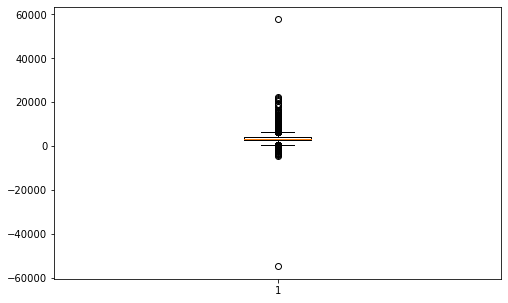

In [65]:
np.random.seed(10)
fig = plt.figure(figsize =(8,5))
 
# Creating plot
plt.boxplot(arby_df['Sales_TY'])
 
# show plot
plt.show()

In [66]:
arby_df=arby_df.drop(arby_df[(arby_df['Sales_TY'] > 40000) |(arby_df['Sales_TY']<0) ].index)                   

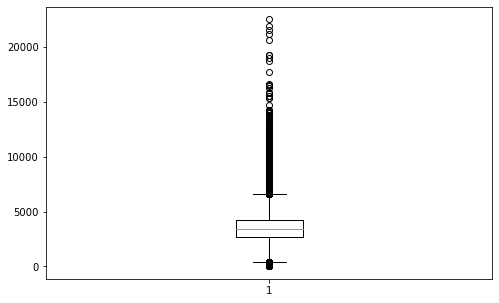

In [67]:
np.random.seed(10)
fig = plt.figure(figsize =(8,5))
 
# Creating plot
plt.boxplot(arby_df['Sales_TY'])
 
# show plot
plt.show()

Number of restaurant per DMA, per state:

In [68]:
(arby_df.groupby(['Rest_DMA_Code','REST_ADDRSTATE'])['Rest_Number'].nunique().sort_values(ascending=False))

Rest_DMA_Code  REST_ADDRSTATE
524            GA                81
613            MN                67
510            OH                58
527            IN                56
505            MI                52
659            TN                48
563            MI                42
508            PA                39
630            AL                38
770            UT                34
534            FL                32
535            OH                29
518            NC                25
560            NC                25
509            IN                23
529            KY                22
557            TN                21
547            OH                20
691            AL                20
561            FL                19
513            MI                18
539            FL                16
555            NY                16
544            VA                16
566            PA                16
528            FL                15
588            IN                1

No of Arby's restaurants per state:

In [69]:
(arby_df.groupby('REST_ADDRSTATE')['Rest_Number'].nunique().sort_values(ascending=False))

REST_ADDRSTATE
MI    119
OH    117
IN    112
GA    103
PA     89
FL     83
MN     82
TN     80
NC     75
AL     68
KY     48
VA     42
UT     34
NY     30
SC     28
MD     12
NJ     12
CT      9
IL      6
MS      5
MO      4
WI      4
TX      2
WV      2
CA      1
WA      1
WY      1
Name: Rest_Number, dtype: int64

Average sales per day per restaurant in each DMA and state:

In [70]:
(arby_df.groupby(['Rest_DMA_Code','REST_ADDRSTATE'])['Sales_TY'].mean().sort_values(ascending=False))

Rest_DMA_Code  REST_ADDRSTATE
557            TN                5074.620367
649            KY                4892.158199
770            WY                4868.485933
613            WI                4771.493712
520            SC                4527.338361
632            IL                4463.592802
517            SC                4377.456758
611            MN                4349.189248
512            MD                4174.507386
501            NY                4163.522501
509            IN                4151.494507
639            TN                4037.807410
529            IN                4028.038592
565            PA                4002.771077
               NY                3978.773401
596            OH                3957.291667
640            MS                3906.439559
632            KY                3887.297380
536            OH                3857.221791
613            MN                3856.395474
630            AL                3807.247843
546            SC        

Average sales of Arby's per restaurant per state:

In [71]:
(arby_df.groupby('REST_ADDRSTATE')['Rest_Number'].mean().sort_values(ascending=False))

REST_ADDRSTATE
MO    7584.750000
WI    7129.500000
IL    6607.788161
NJ    6582.333333
MD    6203.357195
MN    5839.797206
MS    5625.419659
SC    5414.982896
AL    5371.565698
CA    5291.000000
IN    5071.484526
NC    5053.801102
VA    5025.898352
GA    4846.949403
TN    4801.029578
NY    4653.297617
PA    4639.405890
CT    4452.939744
MI    3906.071563
FL    3734.515009
KY    3627.012196
OH    3419.059601
UT    2601.378070
WV    1638.627283
WY    1597.000000
WA    1329.000000
TX     627.600000
Name: Rest_Number, dtype: float64

Total amount of sales per state:

In [72]:
(arby_df.groupby('REST_ADDRSTATE')['Sales_TY'].sum().sort_values(ascending=False))

REST_ADDRSTATE
MI    5.939179e+08
OH    5.892290e+08
IN    5.664309e+08
GA    4.514239e+08
MN    4.365868e+08
PA    3.996806e+08
AL    3.588656e+08
FL    3.522714e+08
NC    3.463433e+08
TN    3.461104e+08
KY    2.205648e+08
UT    1.623837e+08
SC    1.407654e+08
VA    8.317516e+07
NY    4.253321e+07
MD    4.017592e+07
IL    3.257530e+07
NJ    3.255501e+07
WI    2.603300e+07
MS    2.509445e+07
CT    2.440274e+07
MO    2.044268e+07
WV    7.872444e+06
WY    7.098252e+06
CA    0.000000e+00
TX    0.000000e+00
WA    0.000000e+00
Name: Sales_TY, dtype: float64

Effect of Thunderstorm on the Sales:

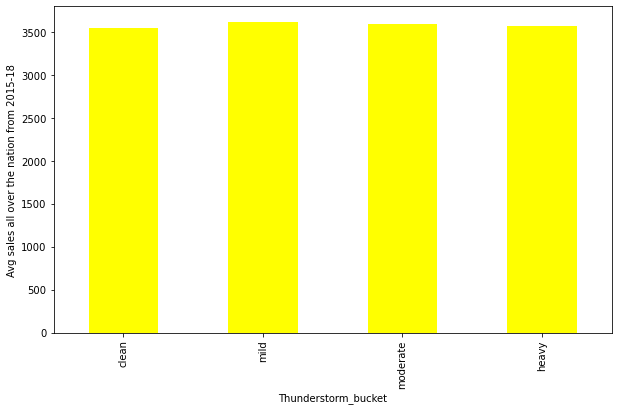

In [73]:
ThunderXSales=(arby_df.groupby('Thunderstorm_bucket')['Sales_TY'].mean())
ax = ThunderXSales.plot(kind = 'bar',color='Yellow',figsize=(10,6))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xticklabels(["clean", "mild", "moderate","heavy"])
plt.show()

Effect of Snow on the Sales:

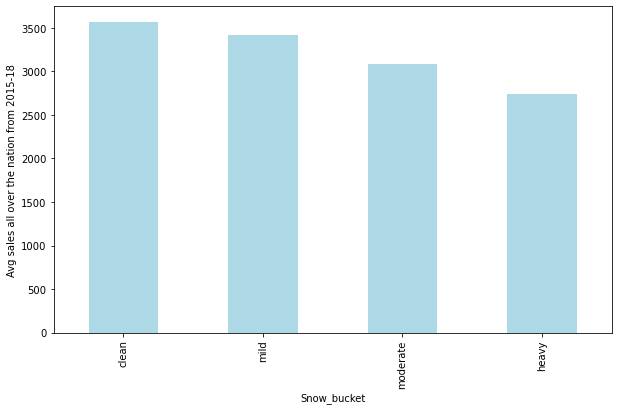

In [74]:
snowXsales=(arby_df.groupby('Snow_bucket')['Sales_TY'].mean())
ax = snowXsales.plot(kind = 'bar',figsize=(10,6),color='LightBlue')
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xticklabels(["clean", "mild", "moderate","heavy"])
plt.show()

Effects of Rain onf the sales:

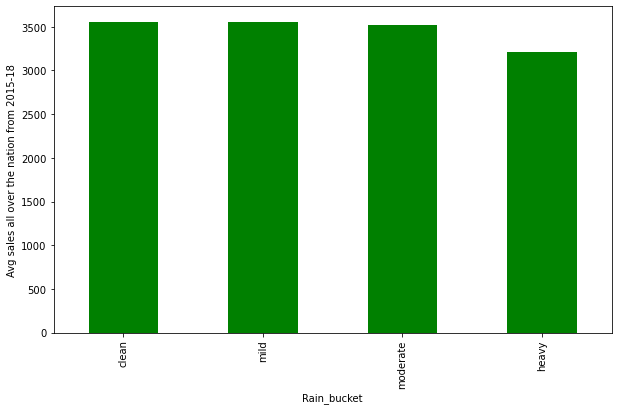

In [75]:
rainXsales=(arby_df.groupby('Rain_bucket')['Sales_TY'].mean())
ax = rainXsales.plot(kind = 'bar',figsize=(10,6),color='Green')
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xticklabels(["clean", "mild", "moderate","heavy"])
plt.show()

In [76]:
mpl.rcParams['agg.path.chunksize'] = 10000

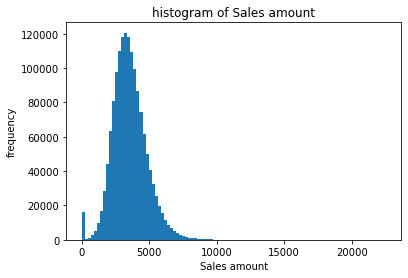

In [77]:
plt.hist(arby_df['Sales_TY'],bins=100)
plt.title('histogram of Sales amount')
plt.xlabel('Sales amount')
plt.ylabel('frequency')
plt.show()

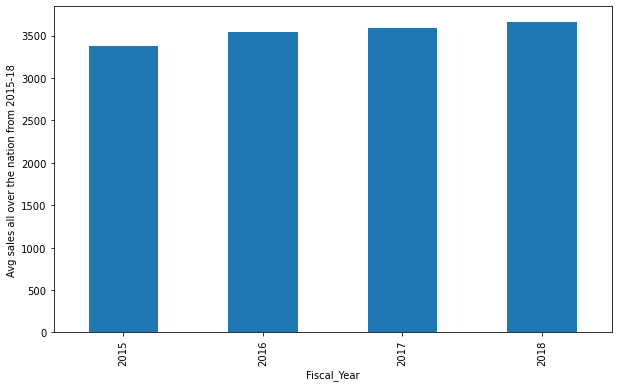

In [78]:
yearXsales=(arby_df.groupby('Fiscal_Year')['Sales_TY'].mean())
ax = yearXsales.plot(kind = 'bar',figsize=(10,6))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
plt.show()

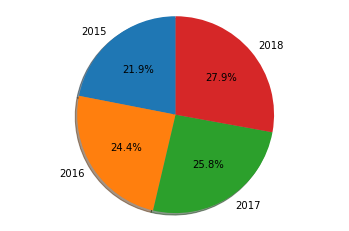

In [79]:
fig1, ax1 = plt.subplots()
sizes=(arby_df.groupby('Fiscal_Year')['Sales_TY'].sum())
ax1.pie(sizes, labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

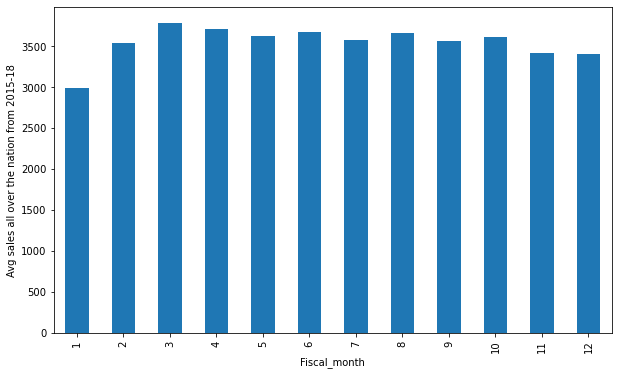

In [80]:
monthXsales=(arby_df.groupby('Fiscal_month')['Sales_TY'].mean())
ax = monthXsales.plot(kind = 'bar',figsize=(10,6))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
plt.show()

In [81]:
monthXsales=(arby_df.groupby('Fiscal_month')['Sales_TY'].sum())

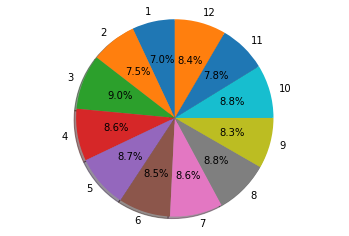

In [82]:
fig1, ax1 = plt.subplots()
ax1.pie(monthXsales, labels=monthXsales.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Average sales in each week of the year over the entire nation:

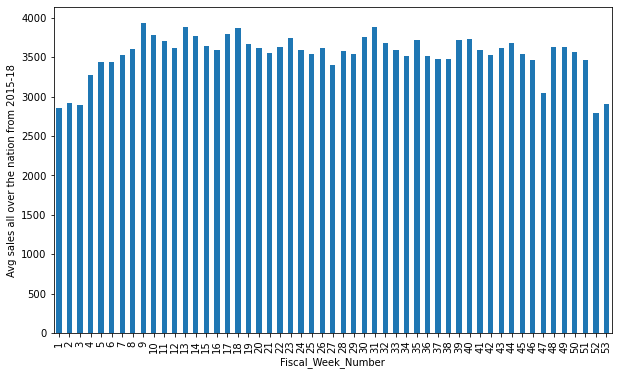

In [83]:
weekXsales=(arby_df.groupby('Fiscal_Week_Number')['Sales_TY'].mean())
ax = weekXsales.plot(kind = 'bar',figsize=(10,6))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
plt.show()

Average Sales on each day of the week:

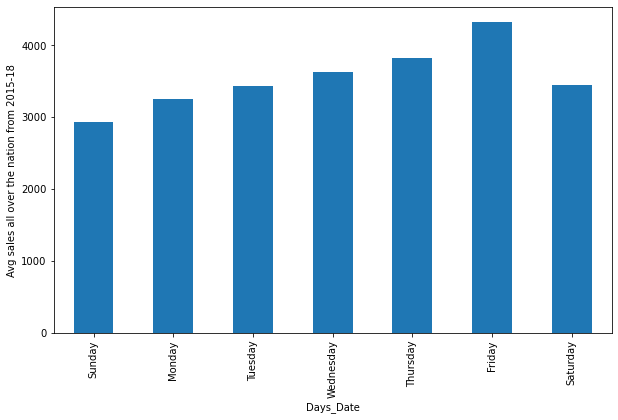

In [84]:
weekDayXsales=(arby_df.groupby(arby_df['Days_Date'].dt.day_name())['Sales_TY'].mean()).reindex(["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"])
ax = weekDayXsales.plot(kind = 'bar',figsize=(10,6))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
plt.show()

Effects of competition in the proximity:

In [85]:
mcdXsales=(arby_df.groupby(arby_df['# of McDonalds <1 mi'])['Sales_TY'].mean())
SubwayXsales=(arby_df.groupby(arby_df['# of Subway <1 mi'])['Sales_TY'].mean())
WendysXsales=(arby_df.groupby(arby_df['# of Wendys <1 mi'])['Sales_TY'].mean())
bkXsales=(arby_df.groupby(arby_df['# of Burger King <1 mi'])['Sales_TY'].mean())
tbXsales=(arby_df.groupby(arby_df['# of Taco Bell <1 mi'])['Sales_TY'].mean())
overall=pd.Series(arby_df['Sales_TY'].mean())
index1=['None']
overall.index = index1
mcdXsales=pd.concat([mcdXsales, overall], axis=0)
SubwayXsales=pd.concat([SubwayXsales, overall], axis=0)
WendysXsales=pd.concat([WendysXsales, overall], axis=0)
bkXsales=pd.concat([bkXsales, overall], axis=0)
tbXsales=pd.concat([tbXsales, overall], axis=0)

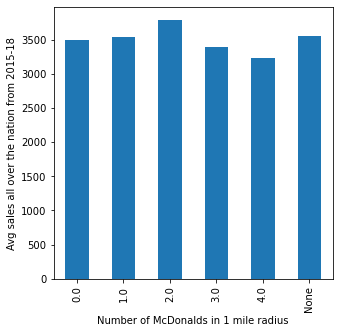

In [86]:
ax = mcdXsales.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xlabel('Number of McDonalds in 1 mile radius')
plt.show()

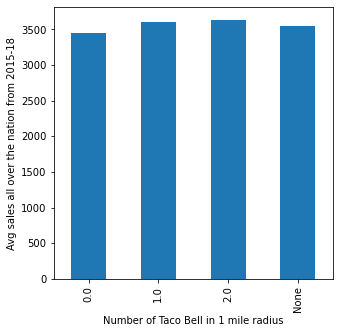

In [87]:
ax = tbXsales.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xlabel('Number of Taco Bell in 1 mile radius')
plt.show()

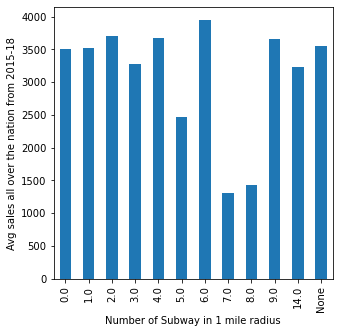

In [88]:
ax = SubwayXsales.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xlabel('Number of Subway in 1 mile radius')
plt.show()

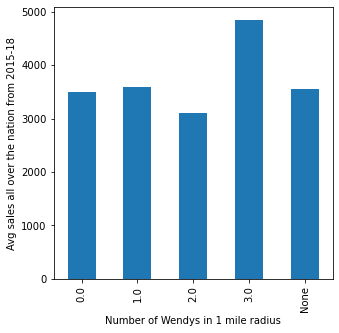

In [89]:
ax = WendysXsales.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xlabel('Number of Wendys in 1 mile radius')
plt.show()

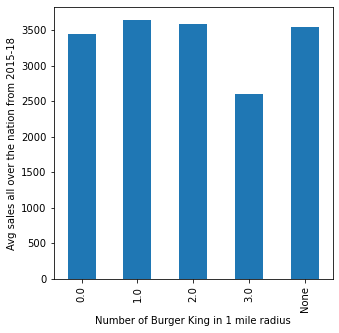

In [90]:
ax = bkXsales.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
ax.set_xlabel('Number of Burger King in 1 mile radius')

plt.show()

<AxesSubplot:xlabel='weeks_remodel', ylabel='Sales_TY'>

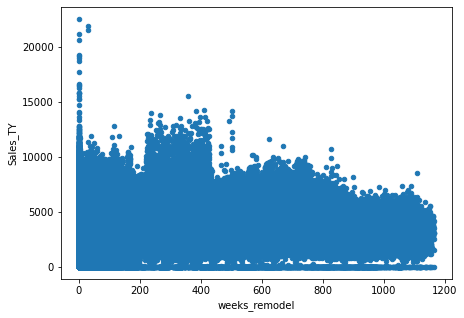

In [91]:
arby_df.plot.scatter(x='weeks_remodel', y='Sales_TY', marker='o', figsize=(7,5))

Effects of temperature show as temperature increases, total daily income increases too

<AxesSubplot:xlabel='Temp_Avg', ylabel='Sales_TY'>

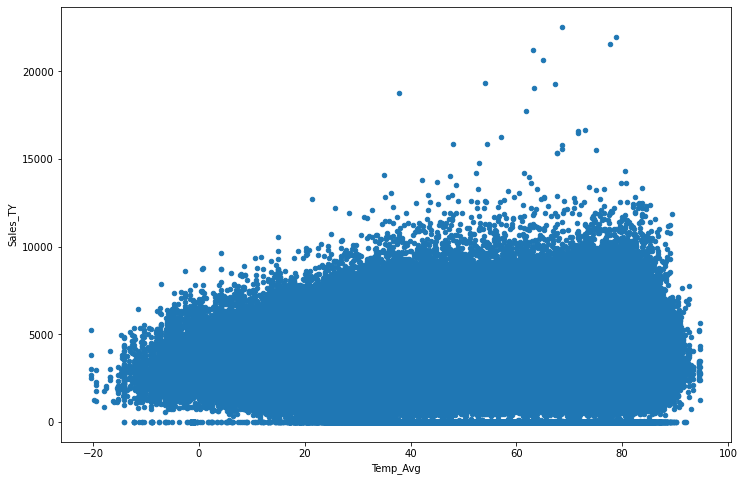

In [92]:
arby_df.plot.scatter(x='Temp_Avg', y='Sales_TY', marker='o', figsize=(12,8))

Remodelling helps increasing avg daily sales by around $250

In [93]:
arby_df['remod_flag'] = np.where(arby_df['weeks_remodel']>0, 1, 0)


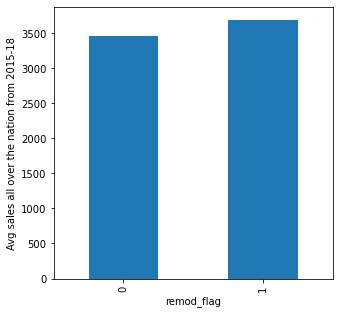

In [94]:
remod=(arby_df.groupby(['remod_flag'])['Sales_TY'].mean())
ax = remod.plot(kind = 'bar',figsize=(5,5))
ax.set_ylabel('Avg sales all over the nation from 2015-18')
plt.show()

In [95]:
remod

remod_flag
0    3453.930968
1    3693.113560
Name: Sales_TY, dtype: float64

In [96]:
arby_df[arby_df["remod_flag"]==1].nunique()["Rest_Number"]

594

In [97]:
arby_df["Rest_Number"].nunique()-arby_df[arby_df["remod_flag"]==1].nunique()["Rest_Number"]

575

In [98]:
arby_df['years_opened']=np.floor((arby_df.Days_Date-arby_df.REST_OPENDATE)/np.timedelta64(1,'Y'))

In [99]:
arby_df['month_opened']=np.floor((arby_df.Days_Date-arby_df.REST_OPENDATE)/np.timedelta64(1,'M'))

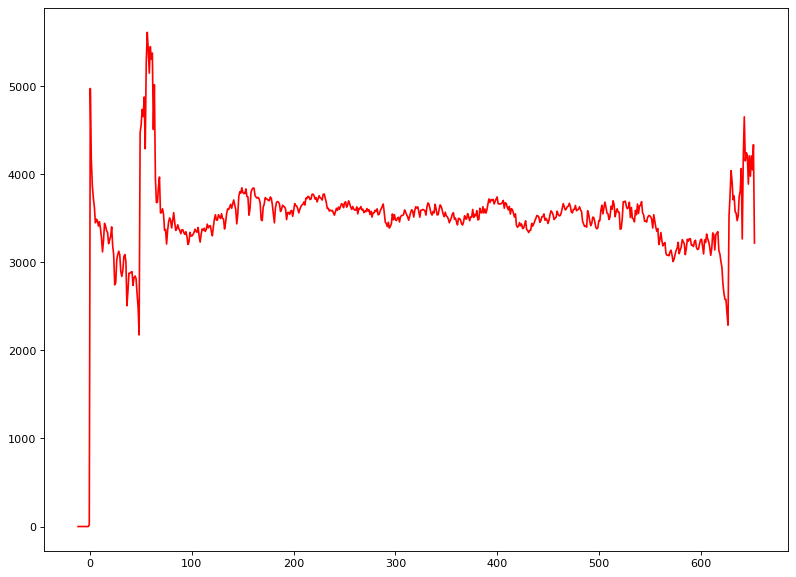

In [100]:
age=(arby_df.groupby(['month_opened'])['Sales_TY'].mean())
figure(figsize=(12, 9), dpi=80)
plt.plot(age,markersize=20,color='red')
plt.show()

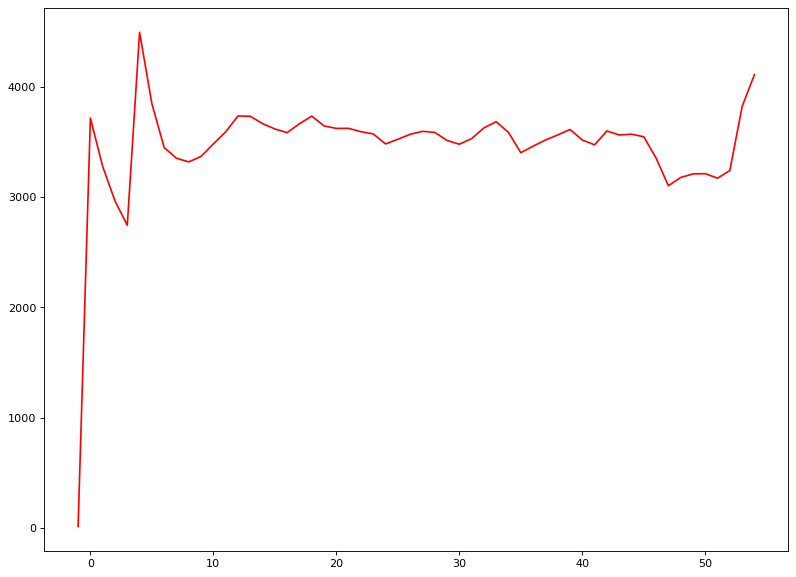

In [101]:
yrs=(arby_df.groupby(['years_opened'])['Sales_TY'].mean())
figure(figsize=(12, 9), dpi=80)
plt.plot(yrs,markersize=20,color='red')
plt.show()

As the age of the restaurant increases, daily avg sales start gradually decreasing

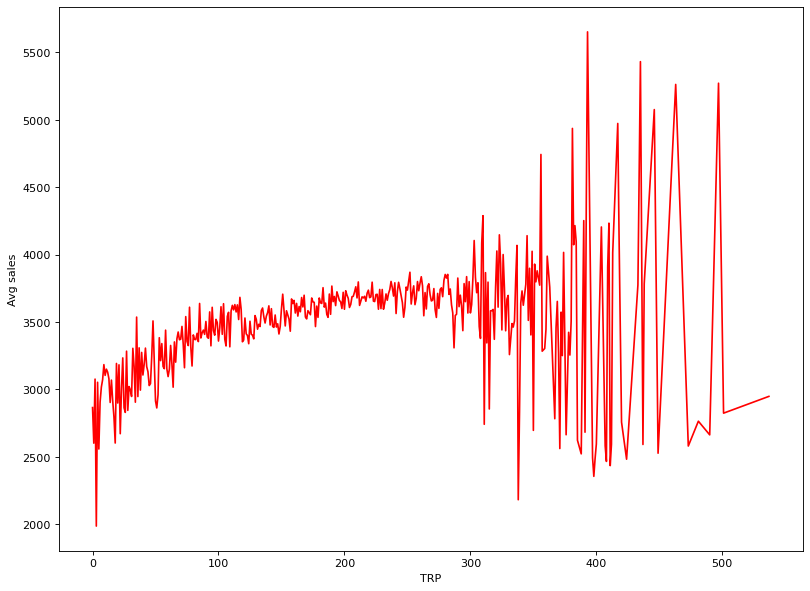

In [102]:
TRPM=(arby_df.groupby(np.ceil(arby_df.Equal_TRPS_CM_TY))['Sales_TY'].mean())
figure(figsize=(12, 9), dpi=80)
plt.plot(TRPM,markersize=20,color='red')
plt.xlabel('TRP')
plt.ylabel('Avg sales')
plt.show()

As we keep increasing the ads, we initially see bump in the sales as the output. But after some point, sales is unaffected by the amount of advertising. That's how we can optimize marketting expenses 

In [103]:
arby_df.sample()

Fiscal_month  Rest_DMA_Code  Fiscal_Week_Number  Rest_Number  \
879617            11            535                  46         1016   

                         Rest_DMA_Desc  Fiscal_Year  Days_Date  Sales_TY  \
879617  COLUMBUS, OH                           2017 2017-11-15   3191.45   

         Temp_Avg  Temp_Max  Temp_Min  Thunderstorm_bucket  Rain_bucket  \
879617  38.801428     47.93     24.53                    0            2   

        Snow_bucket  snow  thunderstorm  rain  clear_weather  REST_STATUS  \
879617            0   0.0           0.0   1.0            0.0            1   

       REST_ADDRSTATE REST_REMODELDT REST_OPENDATE REST_CLOSEDATE  \
879617             OH     2016-10-31    1978-06-24     1753-01-01   

        # of McDonalds <1 mi  # of Subway <1 mi  # of Wendys <1 mi  \
879617                   1.0                1.0                0.0   

        # of Burger King <1 mi  # of Taco Bell <1 mi  # of McDonalds <0.5 mi  \
879617                     0.0                   0.0                     1.0   

        # of Subway <0.5 mi  # of Wendys <0.5 mi  # of Burger King <0.5 mi  \
879617                  1.0                  0.0                       0.0   

        # of Taco Bell <0.5 mi  OnAir_TY  Equal_TRPS_CM_TY  print_coupon  \
879617                     0.0       1.0             166.1             0   

        weeks_opened  weeks_closed  weeks_remodel  remod_flag  years_opened  \
879617   2055.571429           0.0      54.285714           1          39.0   

        month_opened  
879617         472.0

In [104]:
tv=pd.DataFrame(arby_df.groupby(['REST_ADDRSTATE','OnAir_TY'])['Sales_TY'].mean())

We can clearly show the difference in sales as the effects of On Air TV 

In [105]:
(arby_df.groupby(['OnAir_TY'])['Sales_TY'].mean())

OnAir_TY
0.0    3086.091940
1.0    3614.563204
Name: Sales_TY, dtype: float64

Also printing occasional coupons attracts a lot more revenue int the restaurants

In [106]:
(arby_df.groupby(['print_coupon'])['Sales_TY'].mean())

print_coupon
0    3494.833986
1    3800.018535
Name: Sales_TY, dtype: float64

Now lets move to the forecasting piece. We need to identify the feature importance wrt sales

There are a lot of methods to find the feature importance and impact of a variable:
    1) Regression
    2) Tree based algorithms like Random forest, xgboost
    3) PCA
    
We will go with the easiest one for now as regression output provides better interpretability statistically. Also tress based models can introduce bias. So results vary a lot by preprocessing stages
With regression, we could have used lasso or ridge as well for regularization and reducing the bias. But then these algorithms actually reduces the dimention. So we would go with the simple regression
model for now.


We cant directly use month, week and year data since even if its in the integer format, its not integer variable. Its a cyclic ordinal variable where 12>1 as well as 1>12 depending upon which year we are considering. So i will disqualify it from the definition of ordinal variable and use one hot encoding on it along with week
Year however is not a cyclic variable. Its in the sequence and order. So both the methods would work in this case. For convenience i will use it as a ordinal variable. 

In [107]:
arby_df['week_day']=arby_df['Days_Date'].dt.day_name()

In [108]:
one_hot=pd.get_dummies(arby_df.Fiscal_month, prefix='month')
one_hot=one_hot.join(pd.get_dummies(arby_df.week_day, prefix='week'))
one_hot=one_hot.join(pd.get_dummies(arby_df.REST_ADDRSTATE, prefix='state'))

In [109]:
one_hot.sample()

month_1  month_2  month_3  month_4  month_5  month_6  month_7  \
1491361        0        0        0        0        0        0        0   

         month_8  month_9  month_10  month_11  month_12  week_Friday  \
1491361        1        0         0         0         0            0   

         week_Monday  week_Saturday  week_Sunday  week_Thursday  week_Tuesday  \
1491361            0              1            0              0             0   

         week_Wednesday  state_AL  state_CA  state_CT  state_FL  state_GA  \
1491361               0         0         0         0         0         0   

         state_IL  state_IN  state_KY  state_MD  state_MI  state_MN  state_MO  \
1491361         0         0         0         0         0         0         0   

         state_MS  state_NC  state_NJ  state_NY  state_OH  state_PA  state_SC  \
1491361         0         0         0         0         1         0         0   

         state_TN  state_TX  state_UT  state_VA  state_WA  state_WI  state_WV  \
1491361         0         0         0         0         0         0         0   

         state_WY  
1491361         0

In [110]:
dataset=arby_df.drop(['Fiscal_month','Rest_DMA_Code','Rest_Number','Rest_DMA_Desc','REST_ADDRSTATE','REST_REMODELDT','REST_OPENDATE','REST_CLOSEDATE','week_day'],axis=1)

In [111]:
dataset=dataset.join(one_hot)

In [112]:
dataset.dtypes

Fiscal_Week_Number                   int64
Fiscal_Year                          int64
Days_Date                   datetime64[ns]
Sales_TY                           float64
Temp_Avg                           float64
Temp_Max                           float64
Temp_Min                           float64
Thunderstorm_bucket                  int64
Rain_bucket                          int64
Snow_bucket                          int64
snow                               float64
thunderstorm                       float64
rain                               float64
clear_weather                      float64
REST_STATUS                          int64
# of McDonalds <1 mi               float64
# of Subway <1 mi                  float64
# of Wendys <1 mi                  float64
# of Burger King <1 mi             float64
# of Taco Bell <1 mi               float64
# of McDonalds <0.5 mi             float64
# of Subway <0.5 mi                float64
# of Wendys <0.5 mi                float64
# of Burger

In [113]:
test = dataset[dataset['Days_Date'] >= '2018-07-01']
train = dataset[dataset['Days_Date'] < '2018-07-01']

In [114]:
train_Y=train['Sales_TY']
test_Y=test['Sales_TY']
train_X=train.drop(['Sales_TY','Days_Date'],axis=1)
test_X=test.drop(['Sales_TY','Days_Date'],axis=1)

In [115]:
pipeline = Pipeline([
    ("Scaling", StandardScaler()),
    ("Linear Regression", LinearRegression())
])

In [116]:
model=pipeline.fit(train_X, train_Y)

In [117]:
features=train_X.columns.values.tolist()

In [118]:
importance=model['Linear Regression'].coef_

Fiscal_Week_Number  :  -109.30394788028873
Fiscal_Year  :  69.5297146454358
Temp_Avg  :  77.02052531766108
Temp_Max  :  37.90120371649256
Temp_Min  :  -57.384518099918566
Thunderstorm_bucket  :  -5.886896257781871
Rain_bucket  :  -26.49548579164871
Snow_bucket  :  -131.74414332683108
snow  :  66.78122381855671
thunderstorm  :  -6.313120330580443
rain  :  10.215884701755385
clear_weather  :  15.269031044312833
REST_STATUS  :  152.06659127979603
# of McDonalds <1 mi  :  18.120673871676615
# of Subway <1 mi  :  -81.74815841561532
# of Wendys <1 mi  :  75.16315652089467
# of Burger King <1 mi  :  69.81003715995821
# of Taco Bell <1 mi  :  -4.895455816538526
# of McDonalds <0.5 mi  :  19.797730677502305
# of Subway <0.5 mi  :  47.666047903419894
# of Wendys <0.5 mi  :  -69.2935513341986
# of Burger King <0.5 mi  :  24.07976088721241
# of Taco Bell <0.5 mi  :  51.38424672197604
OnAir_TY  :  52.07677968231519
Equal_TRPS_CM_TY  :  76.1202151833665
print_coupon  :  120.6385790406735
weeks_opene

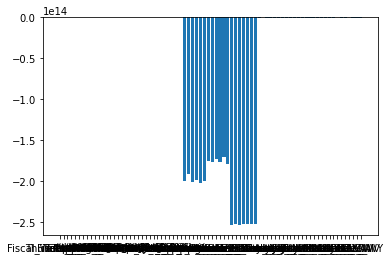

In [119]:
feat={}
for i,v in enumerate(importance):
    feat[features[i]]=abs(v)
    print(features[i],' : ',v)
# plot feature importance
plt.bar(features, importance)
plt.show()

In [120]:
sorted_feat = sorted(feat.items(), key=operator.itemgetter(1),reverse=True)
sort_feat={}
for i in range(len(sorted_feat)):
    sort_feat[sorted_feat[i][0]]=sorted_feat[i][1]
for k,v in sort_feat.items():
    print(k,' : ',v)

week_Friday  :  253400896814303.78
week_Saturday  :  253396915266438.03
week_Thursday  :  252869125681985.75
week_Wednesday  :  252747988142806.7
week_Tuesday  :  252743986378576.03
week_Sunday  :  252709108609025.25
week_Monday  :  252204903109886.22
month_5  :  202388510767442.34
month_3  :  201524047901990.84
month_1  :  200155495403665.0
month_6  :  199563107176967.25
month_4  :  199232435080882.16
month_2  :  192061033865293.44
month_12  :  179418610062940.34
month_10  :  176672288409902.06
month_8  :  176324853328894.5
month_7  :  175827633446033.53
month_9  :  173593529329877.72
month_11  :  171030839641133.88
state_MI  :  831197650913.1344
state_OH  :  824184493517.767
state_IN  :  806364681025.0621
state_GA  :  759867748236.4606
state_PA  :  708641626461.1987
state_MN  :  707507684267.7114
state_FL  :  674072261389.5634
state_NC  :  660390233478.2179
state_AL  :  656290548547.0323
state_TN  :  637540436221.5598
state_KY  :  535670437138.15466
state_UT  :  469647240693.12085
st

In [121]:
test_X1 = test_X.copy()
test_X1['OnAir_TY']=0
test_X1['Equal_TRPS_CM_TY']=0
test_X1['print_coupon']=0

In [122]:
test_X1.sample()

Fiscal_Week_Number  Fiscal_Year   Temp_Avg  Temp_Max  Temp_Min  \
1108616                  33         2018  72.744285     80.33     65.93   

         Thunderstorm_bucket  Rain_bucket  Snow_bucket  snow  thunderstorm  \
1108616                    1            2            0   0.0           1.0   

         rain  clear_weather  REST_STATUS  # of McDonalds <1 mi  \
1108616   1.0            1.0            1                   1.0   

         # of Subway <1 mi  # of Wendys <1 mi  # of Burger King <1 mi  \
1108616                1.0                0.0                     0.0   

         # of Taco Bell <1 mi  # of McDonalds <0.5 mi  # of Subway <0.5 mi  \
1108616                   0.0                     1.0                  1.0   

         # of Wendys <0.5 mi  # of Burger King <0.5 mi  \
1108616                  0.0                       0.0   

         # of Taco Bell <0.5 mi  OnAir_TY  Equal_TRPS_CM_TY  print_coupon  \
1108616                     0.0         0                 0             0   

         weeks_opened  weeks_closed  weeks_remodel  remod_flag  years_opened  \
1108616        1460.0           0.0     889.714286           1          27.0   

         month_opened  month_1  month_2  month_3  month_4  month_5  month_6  \
1108616         335.0        0        0        0        0        0        0   

         month_7  month_8  month_9  month_10  month_11  month_12  week_Friday  \
1108616        0        1        0         0         0         0            0   

         week_Monday  week_Saturday  week_Sunday  week_Thursday  week_Tuesday  \
1108616            0              0            0              0             0   

         week_Wednesday  state_AL  state_CA  state_CT  state_FL  state_GA  \
1108616               1         0         0         0         0         0   

         state_IL  state_IN  state_KY  state_MD  state_MI  state_MN  state_MO  \
1108616         0         1         0         0         0         0         0   

         state_MS  state_NC  state_NJ  state_NY  state_OH  state_PA  state_SC  \
1108616         0         0         0         0         0         0         0   

         state_TN  state_TX  state_UT  state_VA  state_WA  state_WI  state_WV  \
1108616         0         0         0         0         0         0         0   

         state_WY  
1108616         0

In [123]:
withoutBoth_pred=pipeline.predict(test_X1)
withoutBoth_pred.mean()

3256.4879428283125

In [124]:
pred_normal=pipeline.predict(test_X)
pred_normal.mean()

3595.1460963653262

In [125]:
test_X2 = test_X.copy()
test_X3 = test_X.copy()

In [126]:
test_X2['OnAir_TY']=0
test_X2['Equal_TRPS_CM_TY']=0
pred_wotv=pipeline.predict(test_X2)
pred_wotv.mean()

3314.1691988480056

In [127]:
test_X3['print_coupon']=0
pred_wopr=pipeline.predict(test_X3)
pred_wopr.mean()

3537.4648678467697

In [128]:
print("Root Mean squared error: %.2f" % mean_squared_error(test_Y, pred_normal, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, pred_normal))
print("Mean Absolute Error:",mean_absolute_error(test_Y, pred_normal))

Root Mean squared error: 1180.91
Coefficient of determination: 0.16
Mean Absolute Error: 890.6473826317294


In [129]:
print("Root Mean squared error: %.2f" % mean_squared_error(test_Y, withoutBoth_pred, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, withoutBoth_pred))
print("Mean Absolute Error:",mean_absolute_error(test_Y, withoutBoth_pred))

Root Mean squared error: 1244.85
Coefficient of determination: 0.06
Mean Absolute Error: 922.9949300711525


In [130]:
print("Root Mean squared error: %.2f" % mean_squared_error(test_Y, pred_wopr, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, pred_wopr))
print("Mean Absolute Error:",mean_absolute_error(test_Y, pred_wopr))

Root Mean squared error: 1185.20
Coefficient of determination: 0.15
Mean Absolute Error: 889.5070653427216


In [131]:
print("Root Mean squared error: %.2f" % mean_squared_error(test_Y, pred_wotv, squared=False))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(test_Y, pred_wotv))
print("Mean Absolute Error:",mean_absolute_error(test_Y, pred_wotv))

Root Mean squared error: 1226.66
Coefficient of determination: 0.09
Mean Absolute Error: 910.7493045224646


## 2019 Sales Forecasting

Now for forecasting lets see the overall sales trend

In [132]:
arby_df.columns

Index(['Fiscal_month', 'Rest_DMA_Code', 'Fiscal_Week_Number', 'Rest_Number',
       'Rest_DMA_Desc', 'Fiscal_Year', 'Days_Date', 'Sales_TY', 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
       'REST_STATUS', 'REST_ADDRSTATE', 'REST_REMODELDT', 'REST_OPENDATE',
       'REST_CLOSEDATE', '# of McDonalds <1 mi', '# of Subway <1 mi',
       '# of Wendys <1 mi', '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi', 'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon', 'weeks_opened', 'weeks_closed',
       'weeks_remodel', 'remod_flag', 'years_opened', 'month_opened',
       'week_day'],
      dtype='object')

##### Lets take a random store and start analyzing the patterns:

In [133]:
store1=arby_df[(arby_df.Rest_Number==11)].copy()

In [134]:
store1=store1.set_index("Days_Date")

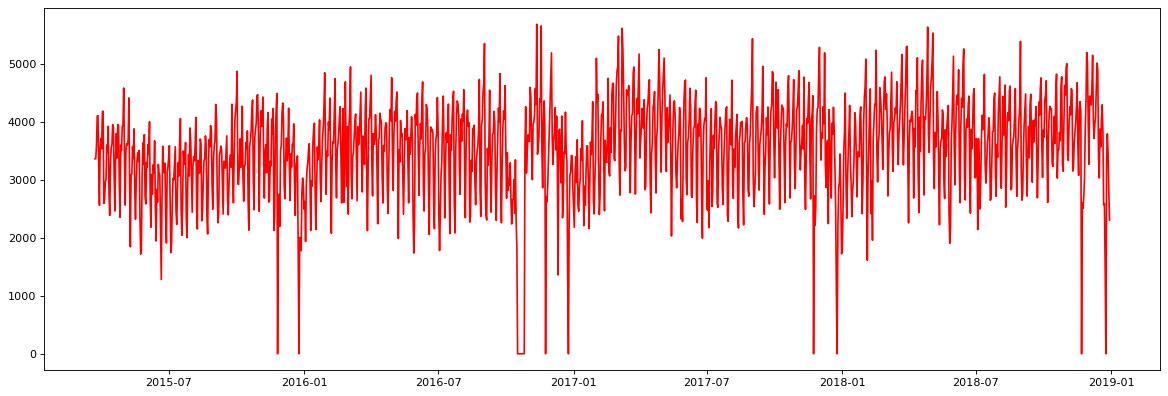

In [135]:
figure(figsize=(18, 6), dpi=80)
plt.plot(store1['Sales_TY'],markersize=20,color='red')
plt.show()

After plotting the sales of 4 yrs, we can see yearly seasonality

In [136]:
store1['Sales_TY'].describe()

count    1376.000000
mean     3515.501802
std       852.858132
min         0.000000
25%      3016.220000
50%      3606.265000
75%      4073.552500
max      5679.700000
Name: Sales_TY, dtype: float64

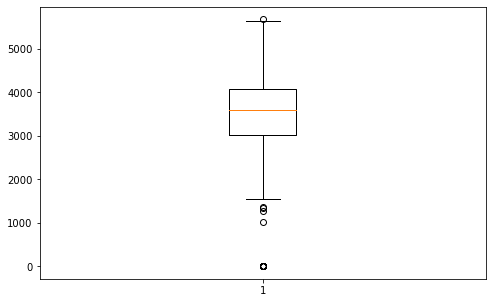

In [137]:
np.random.seed(10)
fig = plt.figure(figsize =(8,5))
 
# Creating plot
plt.boxplot(store1['Sales_TY'])
 
# show plot
plt.show()

In [138]:
store1=store1.drop(store1[(store1['Sales_TY'] > 5500) |(store1['Sales_TY']<1500) ].index)                   

In [139]:
store1['Sales_TY'].describe()

count    1349.000000
mean     3561.322624
std       736.944182
min      1539.380000
25%      3040.170000
50%      3616.710000
75%      4075.480000
max      5474.980000
Name: Sales_TY, dtype: float64

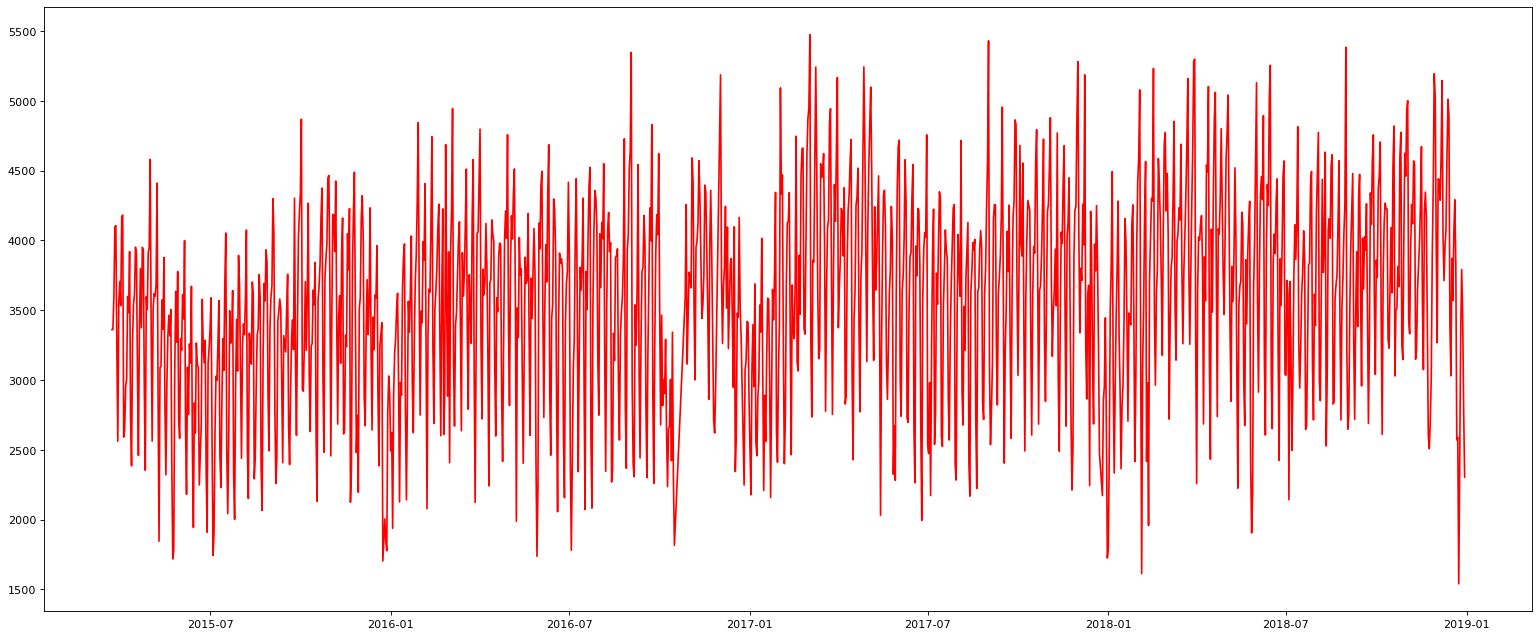

In [140]:
figure(figsize=(24, 10), dpi=80)
plt.plot(store1['Sales_TY'],markersize=20,color='red')
plt.show()

As this is a timeseries, lets analyze for trend and seasonality of the sales:

C:\Users\shrey\AppData\Local\Temp/ipykernel_36084/3964288622.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(store1.Sales_TY.dropna(),freq=365)


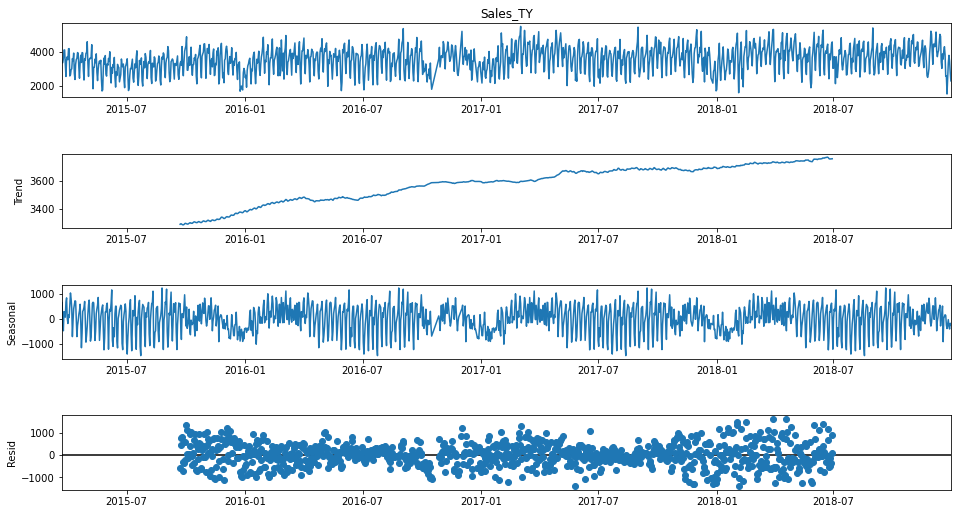

In [141]:
res = sm.tsa.seasonal_decompose(store1.Sales_TY.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

After plotting daily sales of 4 yrs, we see yearly repeatative pattern.

In [142]:
store1.columns

Index(['Fiscal_month', 'Rest_DMA_Code', 'Fiscal_Week_Number', 'Rest_Number',
       'Rest_DMA_Desc', 'Fiscal_Year', 'Sales_TY', 'Temp_Avg', 'Temp_Max',
       'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket', 'Snow_bucket', 'snow',
       'thunderstorm', 'rain', 'clear_weather', 'REST_STATUS',
       'REST_ADDRSTATE', 'REST_REMODELDT', 'REST_OPENDATE', 'REST_CLOSEDATE',
       '# of McDonalds <1 mi', '# of Subway <1 mi', '# of Wendys <1 mi',
       '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi', 'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon', 'weeks_opened', 'weeks_closed',
       'weeks_remodel', 'remod_flag', 'years_opened', 'month_opened',
       'week_day'],
      dtype='object')

Lets aggregate this data on weekly level and then see how the pattern looks:

In [143]:
grouped_single = store1.groupby(['Rest_Number','Fiscal_Week_Number','Fiscal_Year']).agg({'Fiscal_Week_Number':'max', 'Fiscal_Year':'min','Sales_TY':'sum', 'Temp_Avg':'mean', 'Temp_Max':'mean',
       'Temp_Min':'mean', 'Thunderstorm_bucket':'mean', 'Rain_bucket':'mean', 'Snow_bucket':'mean', 'snow':'mean',
       'thunderstorm':'mean', 'rain':'mean', 'clear_weather':'mean', 'REST_STATUS':'min','# of McDonalds <1 mi':'max', '# of Subway <1 mi':'max', '# of Wendys <1 mi':'max',
       '# of Burger King <1 mi':'max', '# of Taco Bell <1 mi':'max',
       '# of McDonalds <0.5 mi':'max', '# of Subway <0.5 mi':'max', '# of Wendys <0.5 mi':'max',
       '# of Burger King <0.5 mi':'max', '# of Taco Bell <0.5 mi':'max', 'OnAir_TY':'mean',
       'Equal_TRPS_CM_TY':'mean', 'print_coupon':'mean', 'weeks_opened':'mean', 'weeks_closed':'max',
       'weeks_remodel':'min', 'remod_flag':'mean', 'month_opened':'mean', 'years_opened':'mean'})


So while aggregating, we are adding most of the integer variables. In terms of weather variables, we are taking an average parameters of the week instead of addition

In [144]:
grouped_single.head(8)

Fiscal_Week_Number  Fiscal_Year  \
Rest_Number Fiscal_Week_Number Fiscal_Year                                    
11          1                  2016                          1         2016   
                               2017                          1         2017   
                               2018                          1         2018   
            2                  2016                          2         2016   
                               2017                          2         2017   
                               2018                          2         2018   
            3                  2016                          3         2016   
                               2017                          3         2017   

                                            Sales_TY   Temp_Avg   Temp_Max  \
Rest_Number Fiscal_Week_Number Fiscal_Year                                   
11          1                  2016         21635.64  29.581020  36.615714   
                               2017         20307.36  19.185102  24.530000   
                               2018         21464.93   9.193265  16.558571   
            2                  2016         22292.93  21.664693  26.072857   
                               2017         22012.47  27.321836  34.815714   
                               2018         23099.05  28.919795  35.587143   
            3                  2016         23025.77  20.030000  25.301429   
                               2017         20951.97  37.276938  44.330000   

                                             Temp_Min  Thunderstorm_bucket  \
Rest_Number Fiscal_Week_Number Fiscal_Year                                   
11          1                  2016         21.701429             0.000000   
                               2017         12.701429             0.000000   
                               2018         -1.698571             0.000000   
            2                  2016         15.015714             0.000000   
                               2017         20.158571             0.000000   
                               2018         19.644286             0.000000   
            3                  2016         12.444286             0.000000   
                               2017         30.444286             0.285714   

                                            Rain_bucket  Snow_bucket  \
Rest_Number Fiscal_Week_Number Fiscal_Year                             
11          1                  2016            0.857143     0.714286   
                               2017            0.285714     0.857143   
                               2018            0.000000     0.714286   
            2                  2016            0.428571     1.000000   
                               2017            0.857143     0.714286   
                               2018            0.571429     0.714286   
            3                  2016            0.000000     0.857143   
                               2017            0.714286     1.000000   

                                                snow  thunderstorm      rain  \
Rest_Number Fiscal_Week_Number Fiscal_Year                                     
11          1                  2016         0.571429      0.000000  0.571429   
                               2017         0.857143      0.000000  0.285714   
                               2018         0.714286      0.000000  0.000000   
            2                  2016         0.857143      0.000000  0.285714   
                               2017         0.428571      0.000000  0.428571   
                               2018         0.428571      0.000000  0.428571   
            3                  2016         0.857143      0.000000  0.000000   
                               2017         0.571429      0.142857  0.428571   

                                            clear_weather  REST_STATUS  \
Rest_Number Fiscal_Week_Number Fiscal_Year                               
11          1        

In [145]:
grouped_single.dtypes

Fiscal_Week_Number            int64
Fiscal_Year                   int64
Sales_TY                    float64
Temp_Avg                    float64
Temp_Max                    float64
Temp_Min                    float64
Thunderstorm_bucket         float64
Rain_bucket                 float64
Snow_bucket                 float64
snow                        float64
thunderstorm                float64
rain                        float64
clear_weather               float64
REST_STATUS                   int64
# of McDonalds <1 mi        float64
# of Subway <1 mi           float64
# of Wendys <1 mi           float64
# of Burger King <1 mi      float64
# of Taco Bell <1 mi        float64
# of McDonalds <0.5 mi      float64
# of Subway <0.5 mi         float64
# of Wendys <0.5 mi         float64
# of Burger King <0.5 mi    float64
# of Taco Bell <0.5 mi      float64
OnAir_TY                    float64
Equal_TRPS_CM_TY            float64
print_coupon                float64
weeks_opened                

In [146]:
grouped_single["period"] = grouped_single["Fiscal_Year"].astype(str) +'-'+ grouped_single["Fiscal_Week_Number"].astype(str)


In [147]:
grouped_single.columns

Index(['Fiscal_Week_Number', 'Fiscal_Year', 'Sales_TY', 'Temp_Avg', 'Temp_Max',
       'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket', 'Snow_bucket', 'snow',
       'thunderstorm', 'rain', 'clear_weather', 'REST_STATUS',
       '# of McDonalds <1 mi', '# of Subway <1 mi', '# of Wendys <1 mi',
       '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi', 'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon', 'weeks_opened', 'weeks_closed',
       'weeks_remodel', 'remod_flag', 'month_opened', 'years_opened',
       'period'],
      dtype='object')

In [148]:
grouped_single=grouped_single.set_index('period')
grouped_single=grouped_single.sort_index(ascending=True)

In [149]:
grouped_single.head()

Fiscal_Week_Number  Fiscal_Year  Sales_TY   Temp_Avg   Temp_Max  \
period                                                                     
2015-13                  13         2015  24340.26  30.701428  38.415714   
2015-14                  14         2015  24390.24  45.303469  53.330000   
2015-15                  15         2015  22080.46  50.299387  57.444286   
2015-16                  16         2015  23806.54  57.738163  65.672857   
2015-17                  17         2015  23715.12  45.009591  50.758571   

          Temp_Min  Thunderstorm_bucket  Rain_bucket  Snow_bucket      snow  \
period                                                                        
2015-13  19.387143                  0.0     0.428571     0.142857  0.142857   
2015-14  33.530000                  0.0     1.000000     0.000000  0.000000   
2015-15  39.187143                  0.0     1.285714     0.000000  0.000000   
2015-16  45.358571                  0.0     0.428571     0.000000  0.000000   
2015-17  34.815714                  0.0     0.285714     0.000000  0.000000   

         thunderstorm      rain  clear_weather  REST_STATUS  \
period                                                        
2015-13           0.0  0.285714       0.571429            1   
2015-14           0.0  0.571429       0.285714            1   
2015-15           0.0  0.714286       0.285714            1   
2015-16           0.0  0.428571       0.428571            1   
2015-17           0.0  0.428571       0.428571            1   

         # of McDonalds <1 mi  # of Subway <1 mi  # of Wendys <1 mi  \
period                                                                
2015-13                   1.0                2.0                1.0   
2015-14                   1.0                2.0                1.0   
2015-15                   1.0                2.0                1.0   
2015-16                   1.0                2.0                1.0   
2015-17                   1.0                2.0                1.0   

         # of Burger King <1 mi  # of Taco Bell <1 mi  # of McDonalds <0.5 mi  \
period                                                                          
2015-13                     1.0                   0.0                     1.0   
2015-14                     1.0                   0.0                     1.0   
2015-15                     1.0                   0.0                     1.0   
2015-16                     1.0                   0.0                     1.0   
2015-17                     1.0                   0.0                     1.0   

         # of Subway <0.5 mi  # of Wendys <0.5 mi  # of Burger King <0.5 mi  \
period                                                                        
2015-13                  1.0                  1.0                       1.0   
2015-14                  1.0                  1.0                       1.0   
2015-15                  1.0                  1.0                       1.0   
2015-16                  1.0                  1.0                       1.0   
2015-17                  1.0                  1.0                       1.0   

         # of Taco Bell <0.5 mi  OnAir_TY  Equal_TRPS_CM_TY  print_coupon  \
period                                                                      
2015-13                     0.0       1.0             142.5           0.0   
2015-14                     0.0       1.0             143.5           0.0   
2015-15                     0.0       1.0             197.5           0.0   
2015-16                     0.0       1.0             191.5           0.0   
2015-17                     0.0       1.0             191.0           0.0   

         weeks_opened  weeks_closed  weeks_remodel  remod_flag  month_opened  \
period                                                                         
2015-13   2530.142857           0.0            0.0         0.0         581.0   
2015-14   2531.142857           0.0            0.0         0.0         582.0   


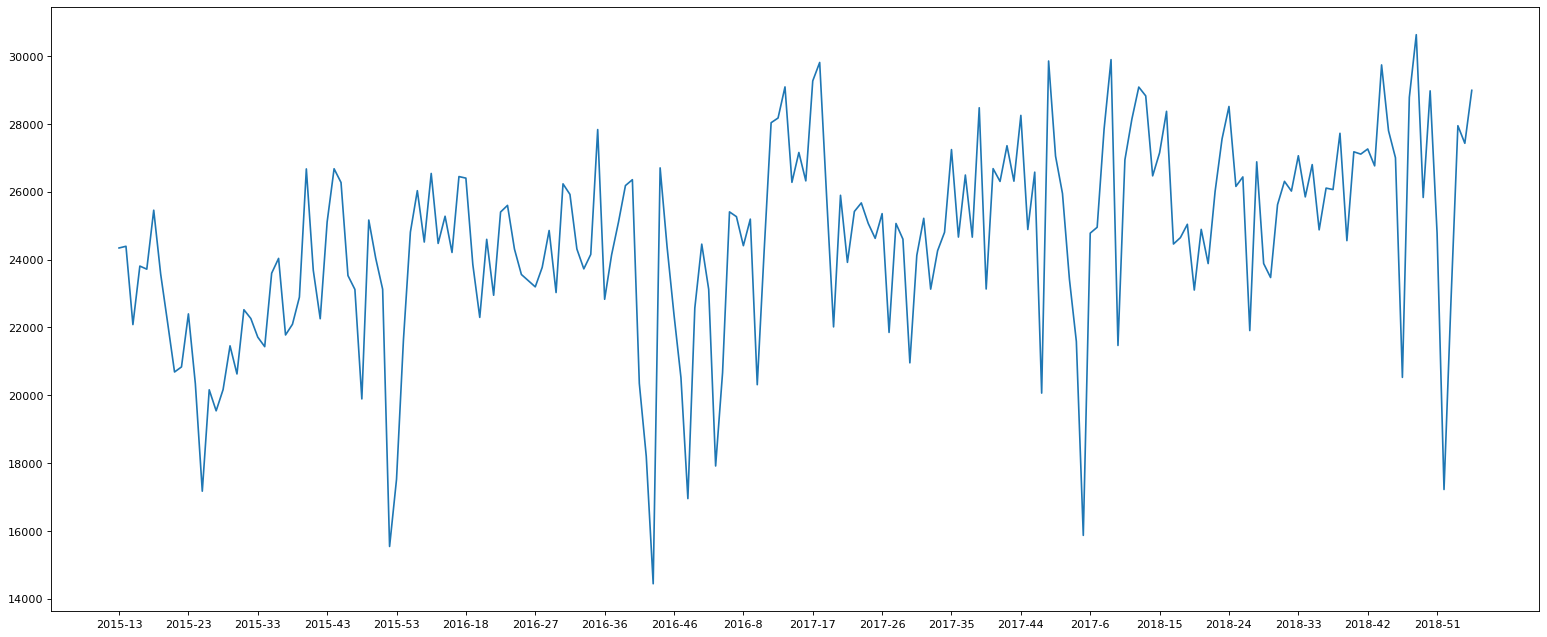

In [150]:
figure(figsize=(24, 10), dpi=80)
plt.plot(grouped_single['Sales_TY'])
plt.xticks(np.arange(0, len(grouped_single)+1, 10))
plt.show()

C:\Users\shrey\AppData\Local\Temp/ipykernel_36084/3929624607.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(grouped_single.Sales_TY.dropna(),freq=52)


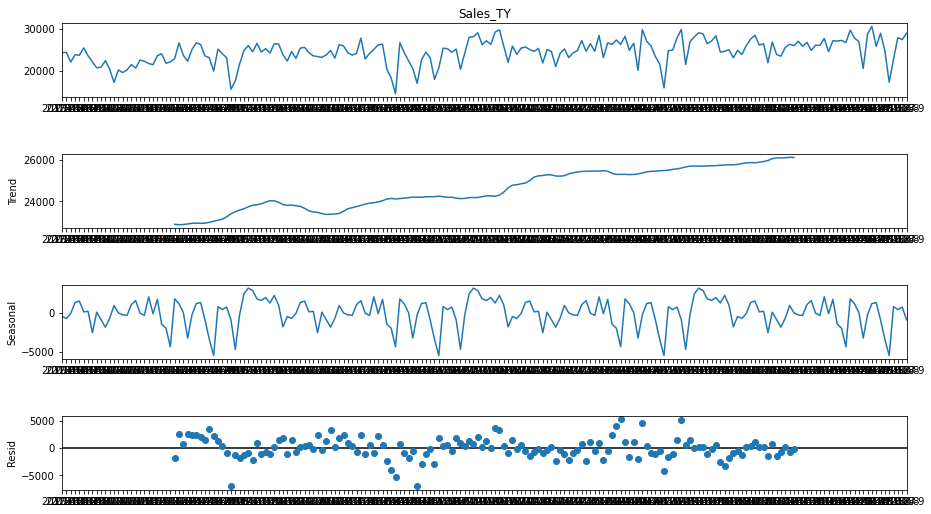

In [151]:
res = sm.tsa.seasonal_decompose(grouped_single.Sales_TY.dropna(),freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

After a lot of playing with data, I observed that there is a yearly seasonality in the data.

In [152]:
arby_df.columns

Index(['Fiscal_month', 'Rest_DMA_Code', 'Fiscal_Week_Number', 'Rest_Number',
       'Rest_DMA_Desc', 'Fiscal_Year', 'Days_Date', 'Sales_TY', 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
       'REST_STATUS', 'REST_ADDRSTATE', 'REST_REMODELDT', 'REST_OPENDATE',
       'REST_CLOSEDATE', '# of McDonalds <1 mi', '# of Subway <1 mi',
       '# of Wendys <1 mi', '# of Burger King <1 mi', '# of Taco Bell <1 mi',
       '# of McDonalds <0.5 mi', '# of Subway <0.5 mi', '# of Wendys <0.5 mi',
       '# of Burger King <0.5 mi', '# of Taco Bell <0.5 mi', 'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon', 'weeks_opened', 'weeks_closed',
       'weeks_remodel', 'remod_flag', 'years_opened', 'month_opened',
       'week_day'],
      dtype='object')

In [153]:
arby_int=arby_df[['Fiscal_month', 'Rest_DMA_Code', 'Fiscal_Week_Number', 'Fiscal_Year',
       'Rest_Number', 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
       'REST_STATUS', '# of McDonalds <1 mi', '# of Subway <1 mi', '# of Wendys <1 mi',
       '# of Burger King <1 mi', '# of Taco Bell <1 mi', 'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon', 'weeks_opened',
       'weeks_remodel', 'remod_flag', 'month_opened', 'years_opened', 'Sales_TY']]

TO find an impact of each variable, lets use pearson's correlation test and for integer variables and Anova test for categorical variables with the sales:

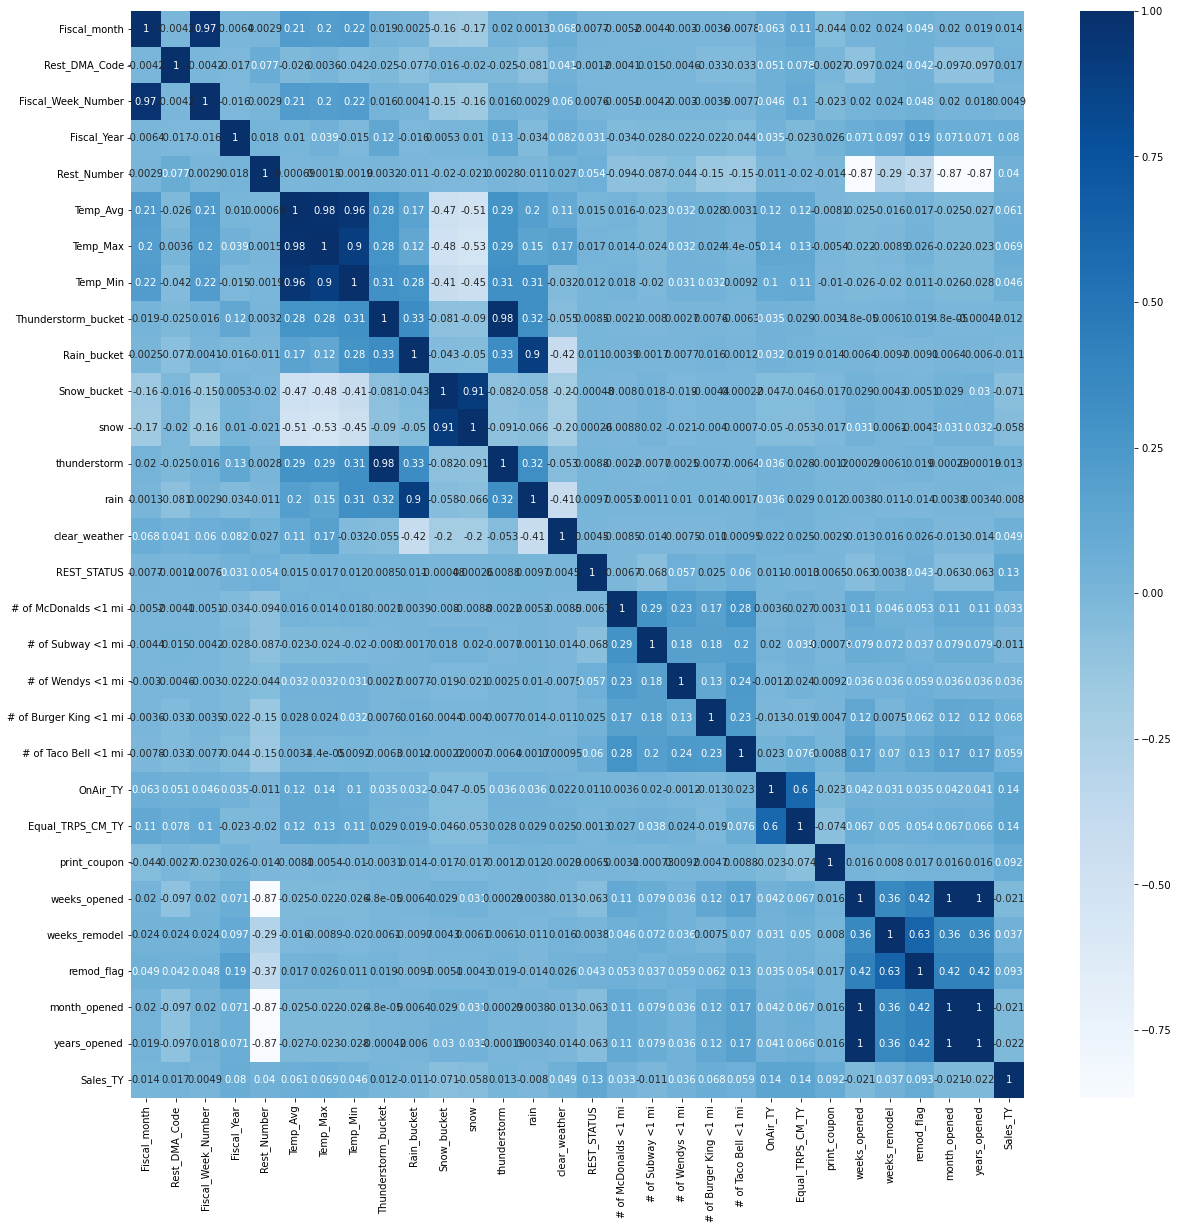

In [154]:

plt.figure(figsize=(20,20))
cor = arby_int.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [155]:
cor_target = abs(cor["Sales_TY"])
#Selecting highly correlated features
display(cor_target.sort_values(ascending=False))

Sales_TY                  1.000000
Equal_TRPS_CM_TY          0.143102
OnAir_TY                  0.139676
REST_STATUS               0.126469
remod_flag                0.092648
print_coupon              0.091509
Fiscal_Year               0.079514
Snow_bucket               0.070532
Temp_Max                  0.068634
# of Burger King <1 mi    0.068047
Temp_Avg                  0.061168
# of Taco Bell <1 mi      0.058644
snow                      0.057553
clear_weather             0.049202
Temp_Min                  0.045955
Rest_Number               0.040075
weeks_remodel             0.037423
# of Wendys <1 mi         0.035774
# of McDonalds <1 mi      0.032634
years_opened              0.021593
weeks_opened              0.021457
month_opened              0.021454
Rest_DMA_Code             0.016875
Fiscal_month              0.013888
thunderstorm              0.012621
Thunderstorm_bucket       0.011952
Rain_bucket               0.011171
# of Subway <1 mi         0.010964
rain                

In [156]:
catCols=['Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket','Rest_DMA_Code','clear_weather',
       'REST_STATUS', 'REST_ADDRSTATE','Fiscal_month','Fiscal_Week_Number']

In [157]:
from statsmodels.formula.api import ols
 
for x in catCols:
    model = ols('Sales_TY' + '~' + x, data =arby_df ).fit() #Oridnary least square method
    result_anova = sm.stats.anova_lm(model) # ANOVA Test
    print(result_anova)

                            df        sum_sq       mean_sq           F  \
Thunderstorm_bucket        1.0  3.391281e+08  3.391281e+08  213.717296   
Residual             1495869.0  2.373655e+12  1.586807e+06         NaN   

                           PR(>F)  
Thunderstorm_bucket  2.139125e-48  
Residual                      NaN  
                    df        sum_sq       mean_sq         F        PR(>F)
Rain_bucket        1.0  2.962413e+08  2.962413e+08  186.6868  1.690909e-42
Residual     1495869.0  2.373698e+12  1.586836e+06       NaN           NaN
                    df        sum_sq       mean_sq            F  PR(>F)
Snow_bucket        1.0  1.181008e+10  1.181008e+10  7478.811431     0.0
Residual     1495869.0  2.362184e+12  1.579139e+06          NaN     NaN
                      df        sum_sq       mean_sq           F        PR(>F)
Rest_DMA_Code        1.0  6.760718e+08  6.760718e+08  426.118457  1.172068e-94
Residual       1495869.0  2.373318e+12  1.586582e+06         NaN      

Considering significance value as 0.05. we say that if the p value is less than 0.05, we assume and claim that there is considerable differences in the mean of the groups formed by each level of the categorical data. That is, we reject the NULL hypothesis.



Different model for all the restaurants as trends and environmental impact as well as location is different for all the restaurants. 


Now to forecast weekly sales we can consider these 2 cases and see which one gives the best results. We can use the same method for all the restaurants: <br>
1) data_week1- weekly seasonality, daily data <br>
2) data_year1- yearly seasonality, weekly data <br>

Lets just build the model for single restaurant. Each restaurant will have different model, different parameters and different factors which affect the sales. But due to time contraints, we can assume that the same factors are affecting the sales for all the restaurants and generalize the model. Although, we are building different models for all the restaurants so we can say that exogenous variables will be the same for all of them for the convenience but the coefficents will be different

In [158]:
arby_df.dtypes

Fiscal_month                         int64
Rest_DMA_Code                        int64
Fiscal_Week_Number                   int64
Rest_Number                          int64
Rest_DMA_Desc                       object
Fiscal_Year                          int64
Days_Date                   datetime64[ns]
Sales_TY                           float64
Temp_Avg                           float64
Temp_Max                           float64
Temp_Min                           float64
Thunderstorm_bucket                  int64
Rain_bucket                          int64
Snow_bucket                          int64
snow                               float64
thunderstorm                       float64
rain                               float64
clear_weather                      float64
REST_STATUS                          int64
REST_ADDRSTATE                      object
REST_REMODELDT              datetime64[ns]
REST_OPENDATE               datetime64[ns]
REST_CLOSEDATE              datetime64[ns]
# of McDona

In [159]:
features_to_use=['Rest_Number','Fiscal_month', 'Fiscal_Year','Fiscal_Week_Number', 'Days_Date', 'Sales_TY', 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
       'OnAir_TY',
       'Equal_TRPS_CM_TY', 'print_coupon','month_opened']

Lets just remove the restaurants which are closed. 

In [160]:
data=arby_df.drop(arby_df[(arby_df['REST_STATUS'] ==0) ].index)                   

In [161]:
data=data[features_to_use]
data = data.set_index('Days_Date')

In [162]:
data1_week=data[(data.Rest_Number==11)]
data1_week=data1_week.sort_index(ascending=True)


In [163]:
data1_week=data1_week.drop(['Rest_Number'],axis=1)

In [164]:
data1_week.head()

Fiscal_month  Fiscal_Year  Fiscal_Week_Number  Sales_TY  \
Days_Date                                                             
2015-03-23             3         2015                  13   3361.53   
2015-03-24             3         2015                  13   3361.53   
2015-03-25             3         2015                  13   3593.85   
2015-03-26             3         2015                  13   4098.10   
2015-03-27             3         2015                  13   4105.72   

             Temp_Avg  Temp_Max  Temp_Min  Thunderstorm_bucket  Rain_bucket  \
Days_Date                                                                     
2015-03-23  27.744285     33.53     20.93                    0            0   
2015-03-24  28.644285     40.73     11.93                    0            0   
2015-03-25  44.844285     51.53     35.33                    0            2   
2015-03-26  37.258571     42.53     31.73                    0            0   
2015-03-27  22.215714     28.13     15.53                    0            0   

            Snow_bucket  snow  thunderstorm  rain  clear_weather  OnAir_TY  \
Days_Date                                                                    
2015-03-23            0   0.0           0.0   0.0            0.0       1.0   
2015-03-24            0   0.0           0.0   0.0            1.0       1.0   
2015-03-25            0   0.0           0.0   1.0            0.0       1.0   
2015-03-26            1   1.0           0.0   0.0            0.0       1.0   
2015-03-27            0   0.0           0.0   0.0            1.0       1.0   

            Equal_TRPS_CM_TY  print_coupon  month_opened  
Days_Date                                                 
2015-03-23             142.5             0         581.0  
2015-03-24             142.5             0         581.0  
2015-03-25             142.5             0         581.0  
2015-03-26             142.5             0         581.0  
2015-03-27             142.5             0         581.0

In [165]:
data1_year=data[(data.Rest_Number==11)]

In [166]:
data1_year = data1_year.groupby(['Fiscal_Week_Number','Fiscal_Year']).agg({'Fiscal_Week_Number':'max', 'Fiscal_Year':'min','Sales_TY':'sum', 'Temp_Avg':'mean', 'Temp_Max':'mean',
       'Temp_Min':'mean', 'Thunderstorm_bucket':'sum', 'Rain_bucket':'sum', 'Snow_bucket':'sum', 'snow':'sum',
       'thunderstorm':'sum', 'rain':'sum', 'clear_weather':'sum',
       'OnAir_TY':'sum','Equal_TRPS_CM_TY':'sum', 'print_coupon':'sum', 'month_opened':'mean'})


Again we are considering different exogenous variables and aggreagations on weekly and yealy data based on the intuation. 

In [167]:
data1_year["period"] = data1_year["Fiscal_Year"].astype(str) +'-'+ data1_year["Fiscal_Week_Number"].astype(str)
data1_year=data1_year.set_index('period')
data1_year=data1_year.sort_index(ascending=True)

In [168]:
data1_year.head(2)

Fiscal_Week_Number  Fiscal_Year  Sales_TY   Temp_Avg   Temp_Max  \
period                                                                     
2015-13                  13         2015  24340.26  30.701428  38.415714   
2015-14                  14         2015  24390.24  45.303469  53.330000   

          Temp_Min  Thunderstorm_bucket  Rain_bucket  Snow_bucket  snow  \
period                                                                    
2015-13  19.387143                    0            3            1   1.0   
2015-14  33.530000                    0            7            0   0.0   

         thunderstorm  rain  clear_weather  OnAir_TY  Equal_TRPS_CM_TY  \
period                                                                   
2015-13           0.0   2.0            4.0       7.0             997.5   
2015-14           0.0   4.0            2.0       7.0            1004.5   

         print_coupon  month_opened  
period                               
2015-13             0         581.0  
2015-14             0         582.0

In [169]:
target_week = data1_week['Sales_TY']
exog_week = data1_week[[ 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
      'OnAir_TY','Equal_TRPS_CM_TY', 'print_coupon']]
 
ad_fuller_result = adfuller(target_week)
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.3485115544478665
p-value: 2.6461959939643218e-08


In [170]:
target_year = data1_year['Sales_TY']
exog_year = data1_year[[ 'Temp_Avg',
       'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket', 'Rain_bucket',
       'Snow_bucket', 'snow', 'thunderstorm', 'rain', 'clear_weather',
      'OnAir_TY','Equal_TRPS_CM_TY', 'print_coupon']]
 
ad_fuller_result = adfuller(target_year)
 
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.3213426561111583
p-value: 0.013950997937153488


In both the cases p-value is less than 0.05. So we can reject the null hypothesis that the sales time series is non-stationary. We can go ahead and try to build the results for both the results and choose the one which captures the results the best.

C:\Users\shrey\AppData\Local\Temp/ipykernel_36084/646710447.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(data1_week.Sales_TY.dropna(),freq=7,model='additive')


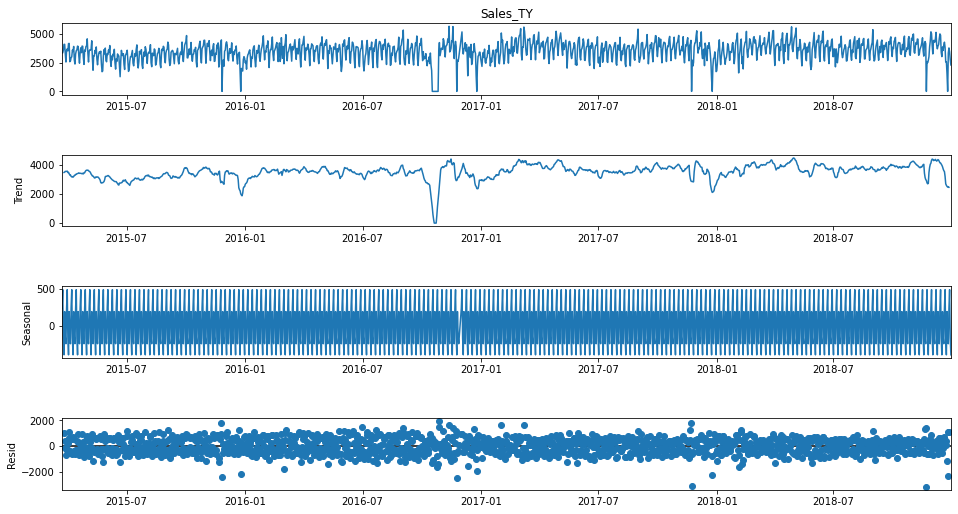

In [171]:
from statsmodels.tsa.seasonal import seasonal_decompose 

res = sm.tsa.seasonal_decompose(data1_week.Sales_TY.dropna(),freq=7,model='additive')
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

C:\Users\shrey\AppData\Local\Temp/ipykernel_36084/3118437446.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(data1_year.Sales_TY.dropna(),freq=52,model='additive')


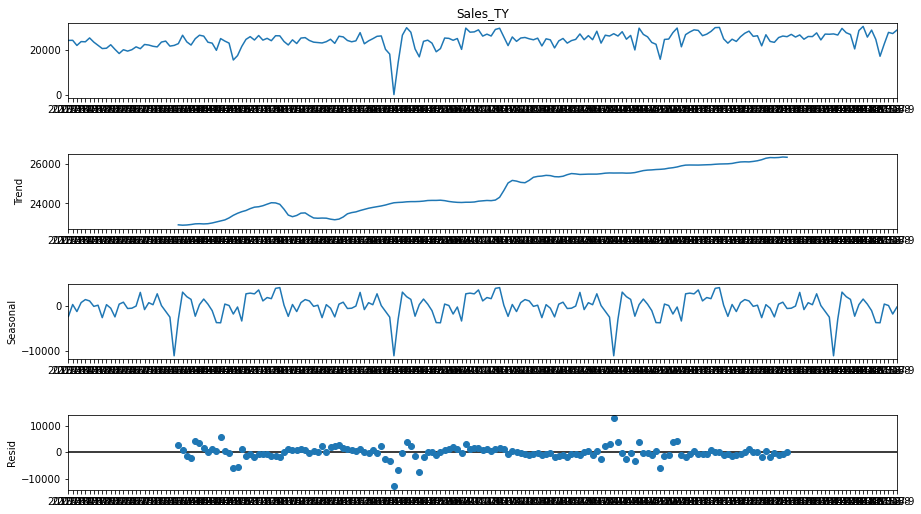

In [172]:
from statsmodels.tsa.seasonal import seasonal_decompose 

res = sm.tsa.seasonal_decompose(data1_year.Sales_TY.dropna(),freq=52,model='additive')
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [173]:
data1_week.shape

(1376, 18)

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool
  sketch_params: (scale: float, length: float, randomne

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

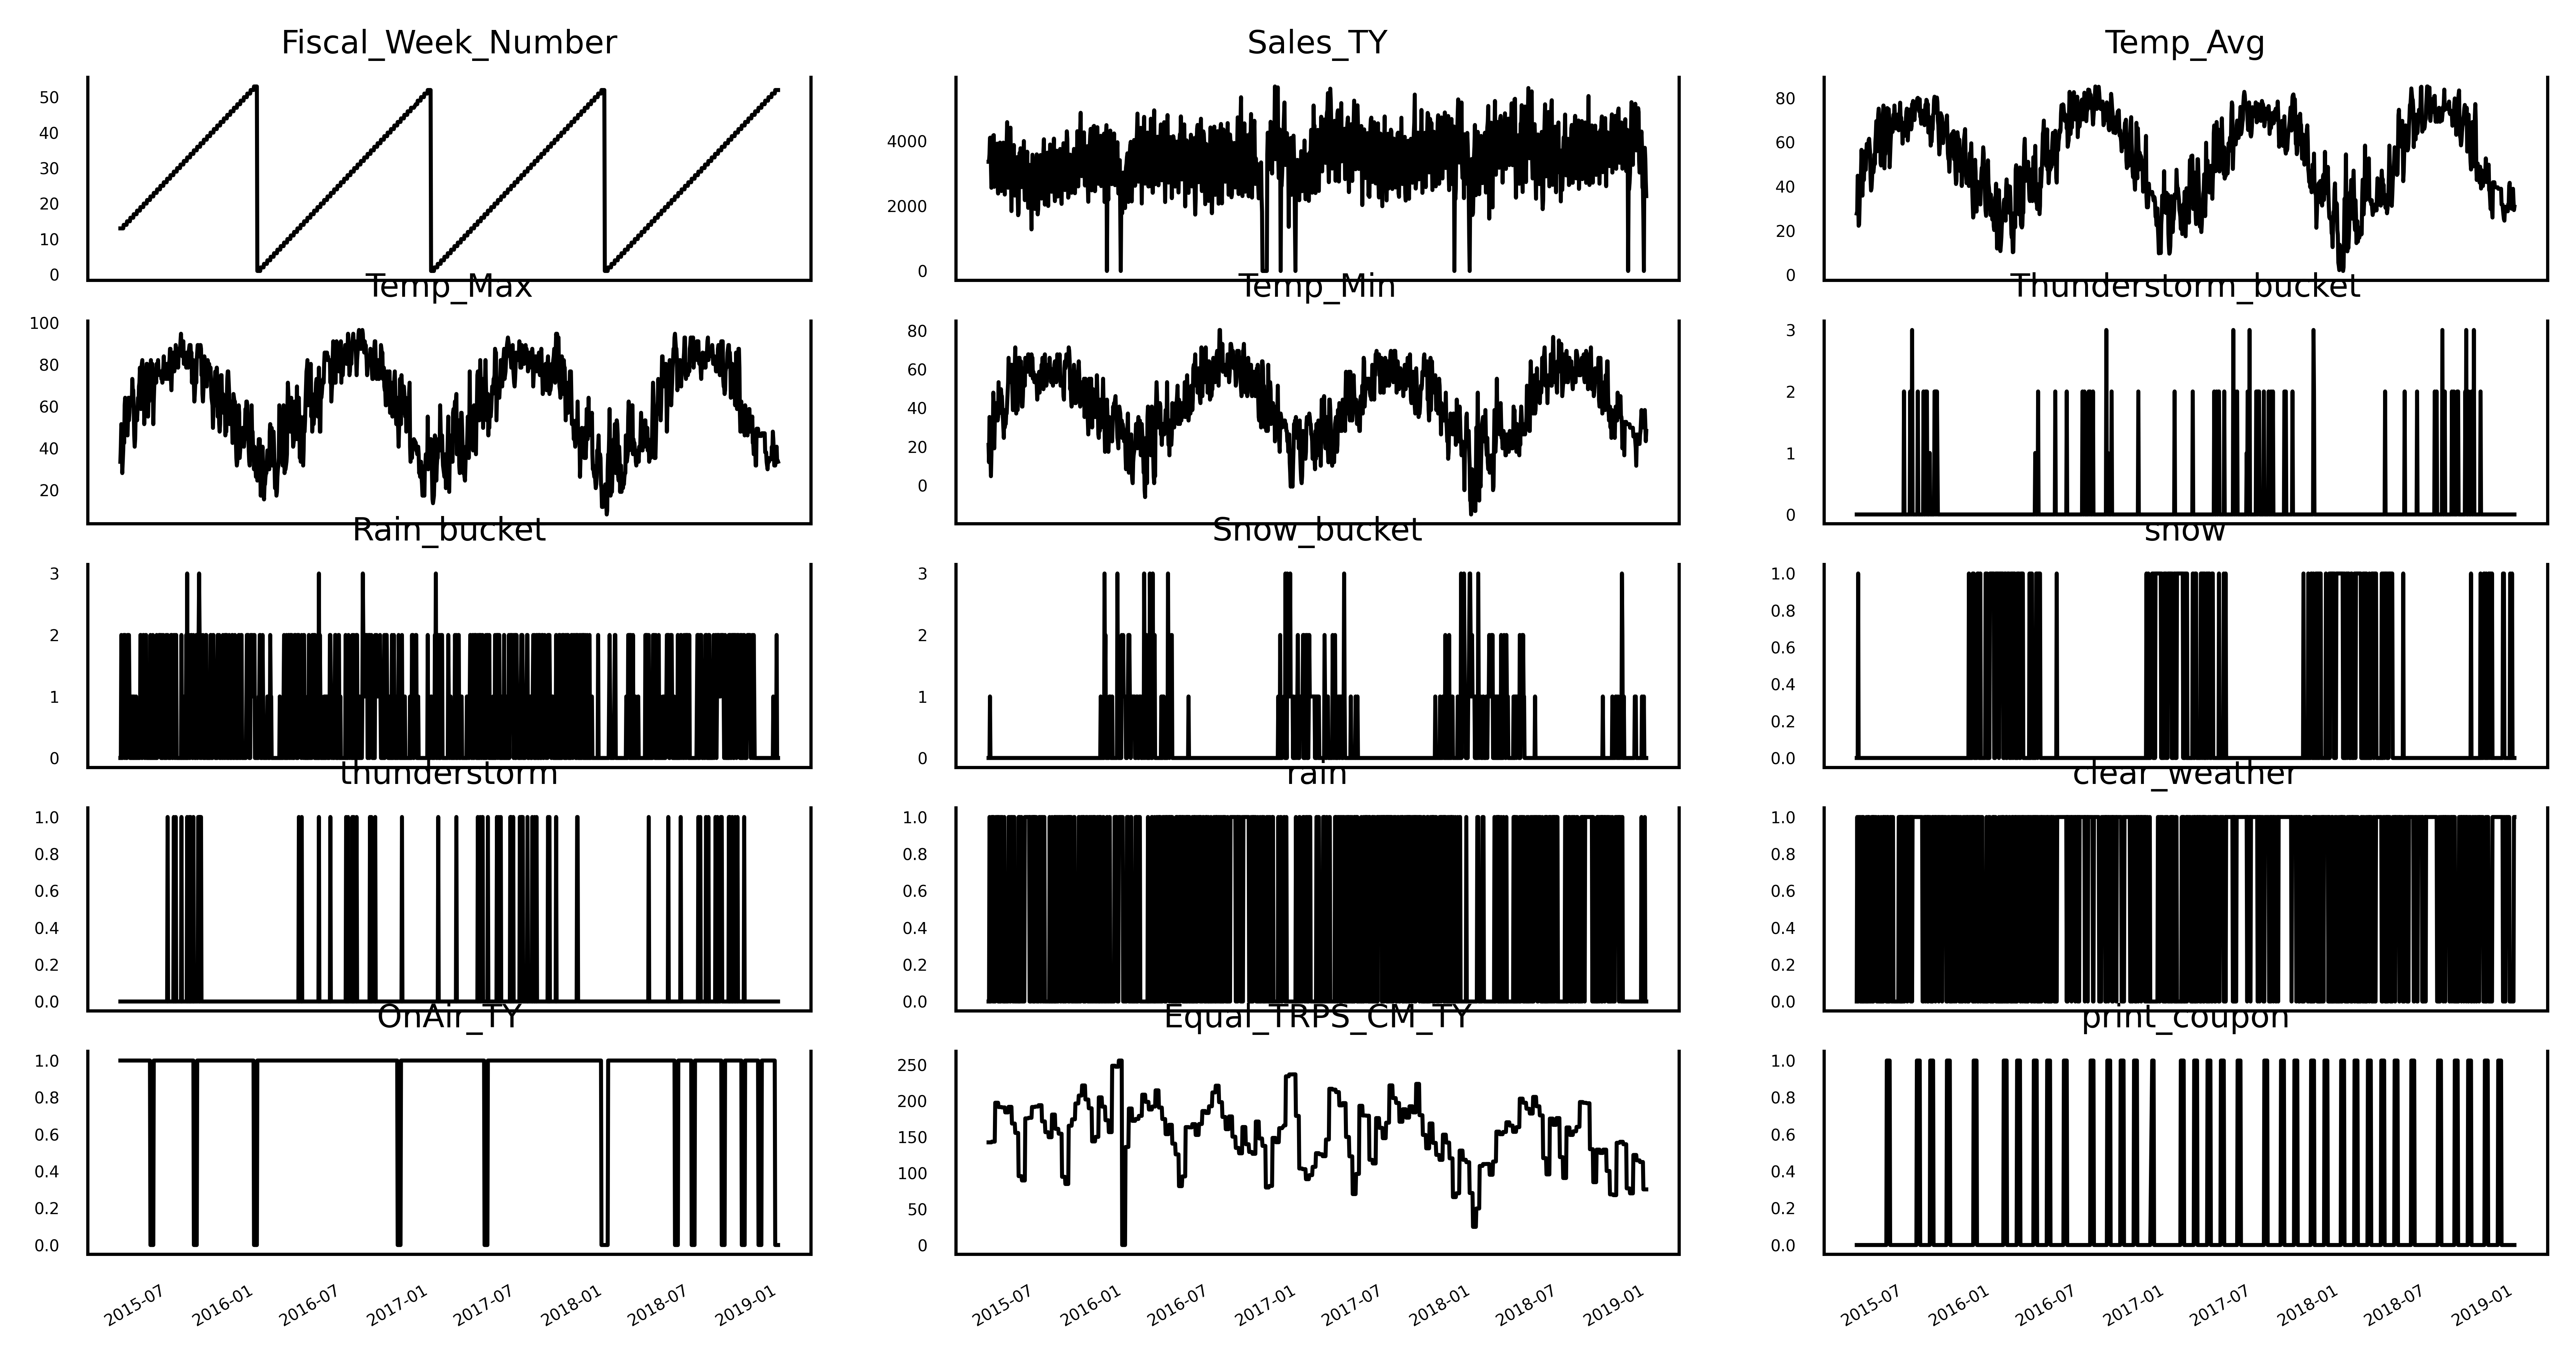

In [174]:
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=800, figsize=(11,6))
 
for i, ax in enumerate(axes.flatten()[:15]):
    x= data1_week[data1_week.columns[i+2]]
    
    ax.plot(x, color='black', linewidth=1)
    ax.set_title(data1_week.columns[i+2],size=8)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=4)
 
plt.setp(axes)
fig.autofmt_xdate()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

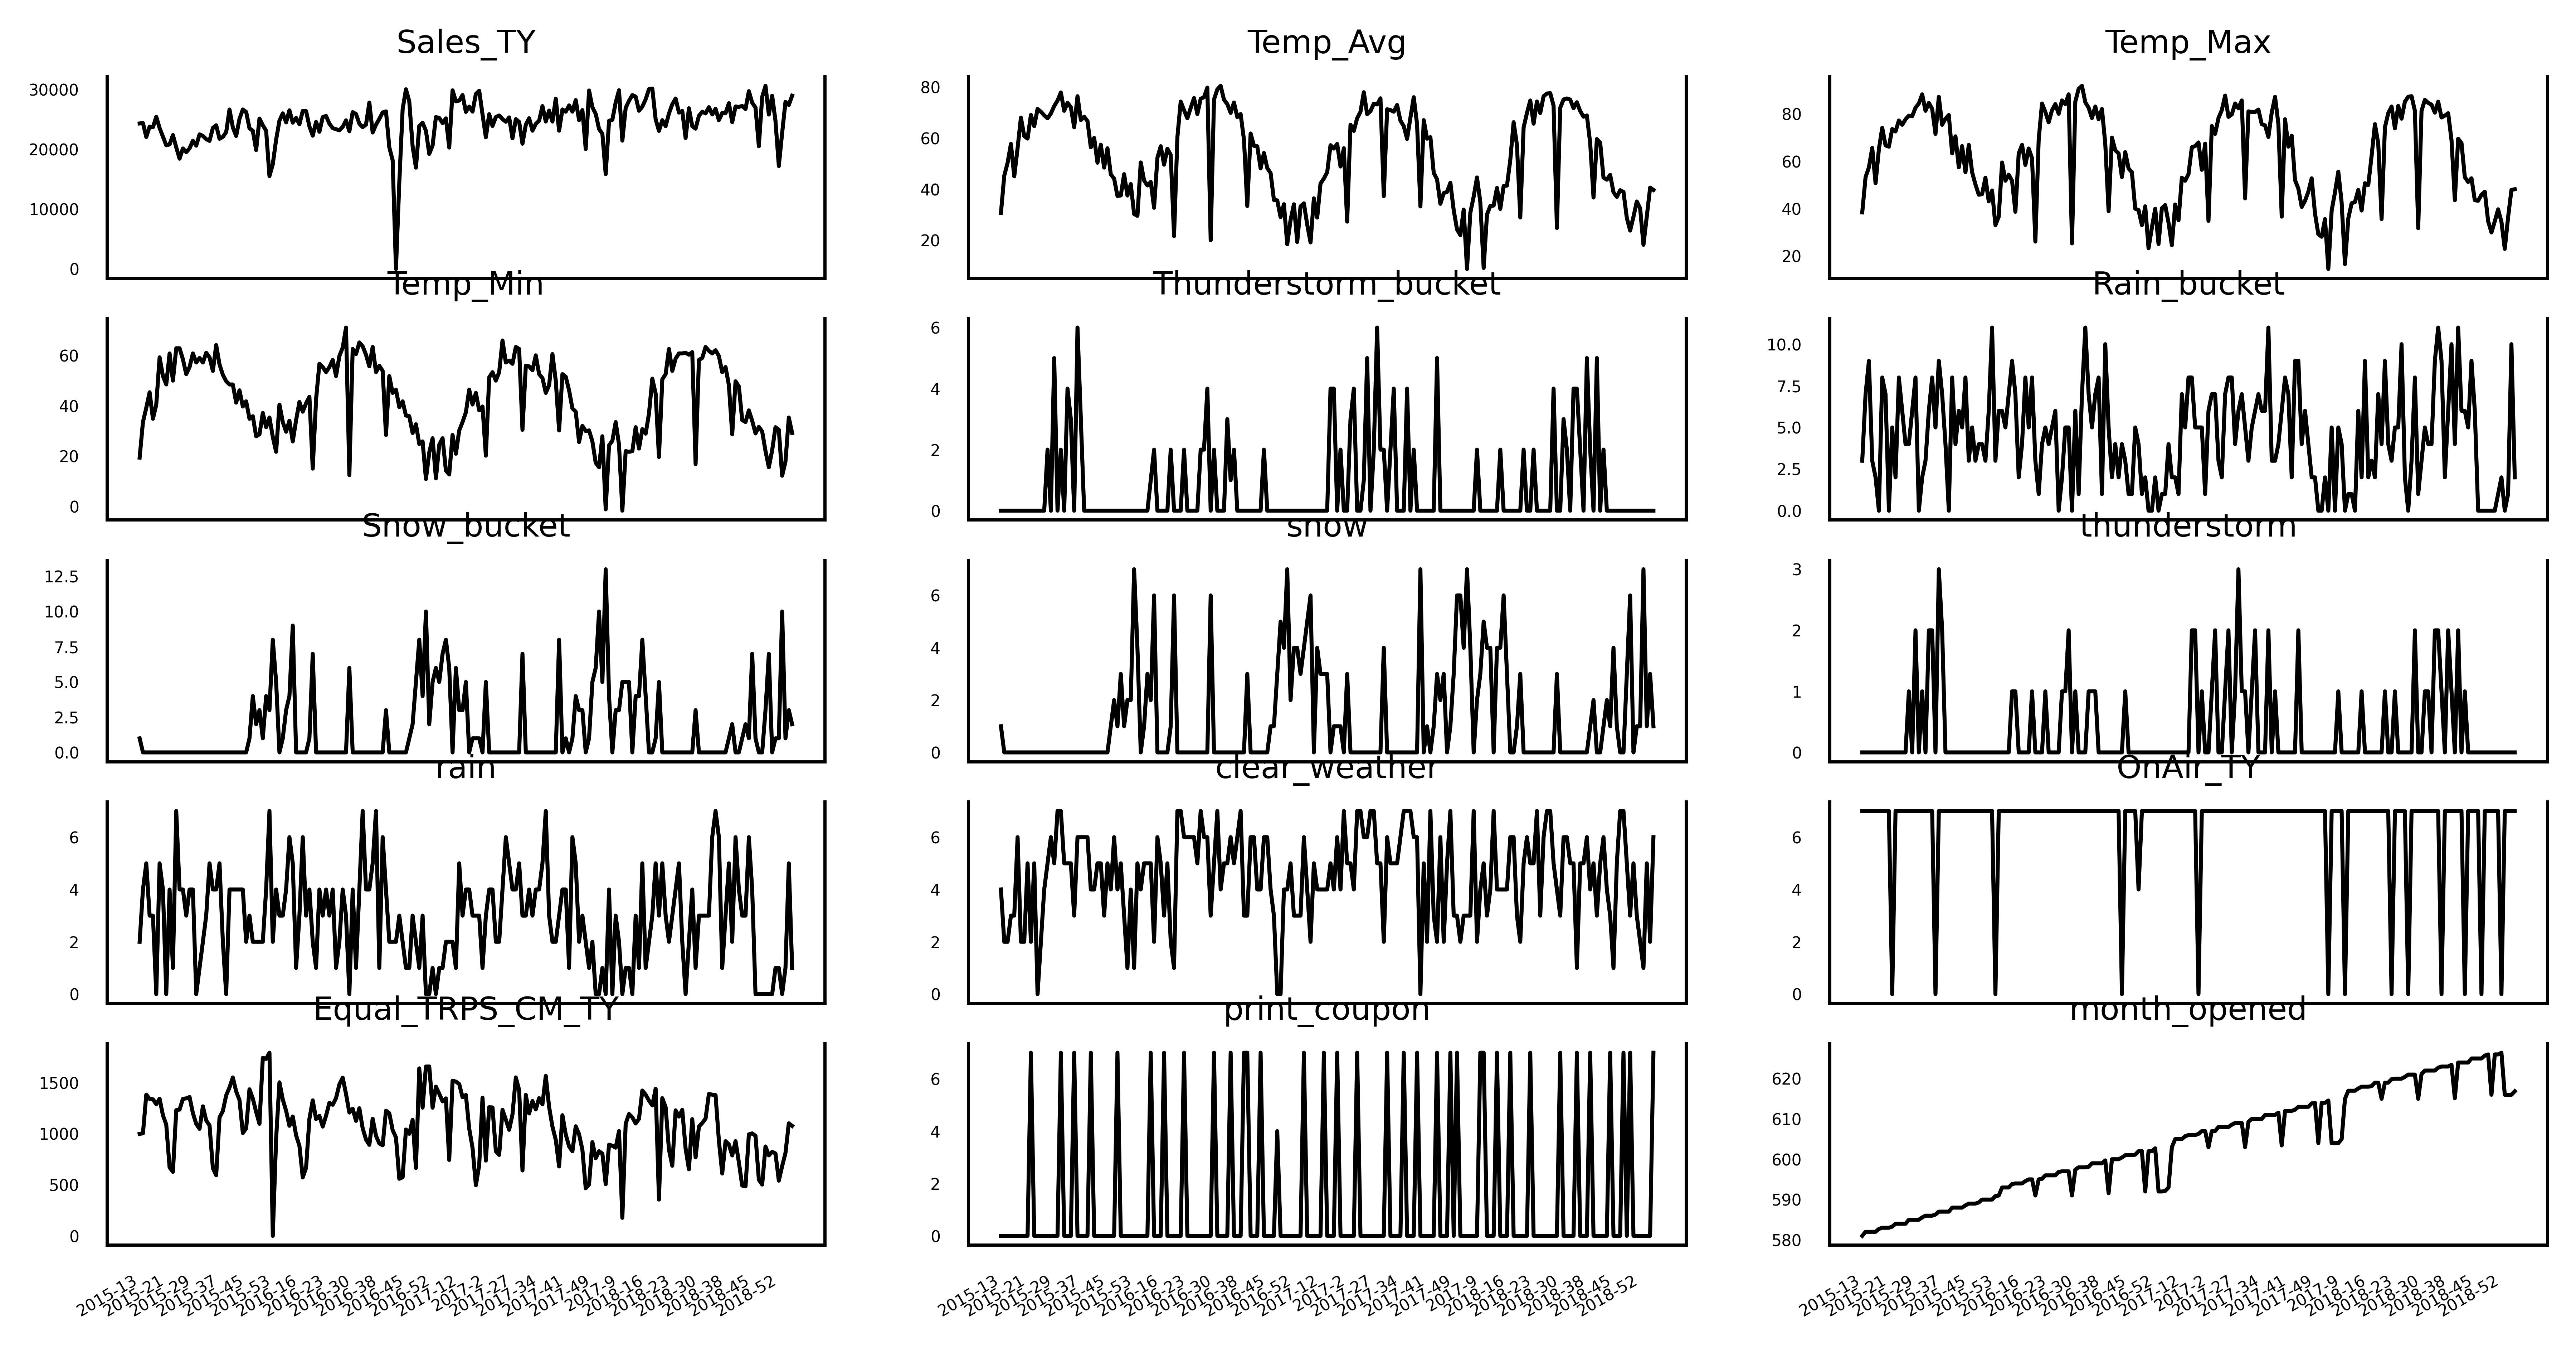

In [175]:
fig, axes = plt.subplots(nrows=5, ncols=3, dpi=800, figsize=(11,6))
 
for i, ax in enumerate(axes.flatten()[:15]):
    x= data1_year[data1_year.columns[i+2]]
    
    ax.plot(x, color='black', linewidth=1)
    ax.set_title(data1_year.columns[i+2],size=8)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=4)
 
plt.setp(axes, xticks=np.arange(0, 208, 8))
fig.autofmt_xdate()
plt.tight_layout

After observing these pattern, we can conclude that apart from the sales there are a lot of seasonal variables which might be affecting the sales. So this is the case of multivariate time series forecasting. There are variety of methods to forecast the sales in this case. 
1) LSTM - Long short term memory - This is the most complex as well as reliable method for multivariate time series forecasting. However this is the best method in case of forecasting on next step. If we have to forecast next n steps, we will have to forecast other exogenous variables as well. <br>
2) VAR- Vector auto regression - This can be the best method to forecast multi-step multivariate forecasting. However, due to time restrictions this method can be complicated to explore for all the restuarants <br>
3) SARIMAX- Seasonal Auto Regression Integrated Moving Average eXogenous - When there are exogenous variables present, SARIMAX is the simplest method which can generalize the forecasting. However in this case also we will have to independantly forecast other exogenous variables for multistep forecasting.


Here's the most basic implementation of SARIMAX model. We need parameter (p,d,q) as well as (P,D,Q,s) <br>
In this case, sales_TY is the dependant variable which we have to predict and all other variables are independant exogenous variables which affect the sales

In [176]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list] , exog: Union[pd.Series, list], order_list: list, d: int, D: int,  s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

Grid search for SARIMAX parameters:

In [177]:
import itertools

In [178]:
target_week_train = target_week[:197]
exog_week_train = exog_week[:197]

In [179]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = 52
 
parameters = itertools.product(p, q, P, Q)
parameters_list = list(parameters)


In [180]:
result_df = optimize_SARIMAX(target_year_train, exog_year_train, parameters_list, d, D, s)

In [216]:
print(result_df[result_df.AIC == result_df.AIC.min()])

(0, 0, 0, 0)


So optimal value of (p,q,P,Q) are (0,0,0,0)

In [182]:
target_year_train = target_year[:156]
exog_year_train = exog_year[:156]

In [183]:
exog_year_train.columns

Index(['Temp_Avg', 'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket',
       'Rain_bucket', 'Snow_bucket', 'snow', 'thunderstorm', 'rain',
       'clear_weather', 'OnAir_TY', 'Equal_TRPS_CM_TY', 'print_coupon'],
      dtype='object')

Lets build the models for both weekly and yearly seasonality data and see which model makes more sense.

In [184]:
best_model_week = SARIMAX(target_week_train, exog_week_train, order=(0,1,0), seasonal_order=(0,0,0,7), simple_differencing=False)
best_model_fit_week = best_model_week.fit(disp=False)
print(best_model_fit_week.summary())

C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:               Sales_TY   No. Observations:                  197
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1547.436
Date:                Tue, 19 Apr 2022   AIC                           3122.871
Time:                        07:55:44   BIC                           3168.765
Sample:                    03-23-2015   HQIC                          3141.451
                         - 10-05-2015                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Temp_Avg              -48.0729     35.405     -1.358      0.175    -117.466      21.320
Temp_Max               26.5838     23.505      1.131      0.258     -19.486      72.654
Temp_Min        

In this case, p value for most of the variables is >0.05. That means these variables dont affect the sales which is not true intuatively. So lets move on to yearly seasonal data

In [185]:
exog_year_train.columns

Index(['Temp_Avg', 'Temp_Max', 'Temp_Min', 'Thunderstorm_bucket',
       'Rain_bucket', 'Snow_bucket', 'snow', 'thunderstorm', 'rain',
       'clear_weather', 'OnAir_TY', 'Equal_TRPS_CM_TY', 'print_coupon'],
      dtype='object')

In [186]:
best_model_year = SARIMAX(target_year_train, exog_year_train, order=(0,1,0), seasonal_order=(0,0,0,52), simple_differencing=False)
best_model_fit_year = best_model_year.fit(disp=False)
print(best_model_fit_year.summary())

C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


                               SARIMAX Results                                
Dep. Variable:               Sales_TY   No. Observations:                  156
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1474.114
Date:                Tue, 19 Apr 2022   AIC                           2976.229
Time:                        07:55:45   BIC                           3018.837
Sample:                             0   HQIC                          2993.535
                                - 156                                         
Covariance Type:                  opg                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Temp_Avg               27.2494    460.518      0.059      0.953    -875.350     929.849
Temp_Max               23.5368    274.603      0.086      0.932    -514.676     561.749
Temp_Min        

From above observation we can conclude that there's no exogenous variable which affects sales in weekly seasonality and only 'OnAir_TY' and 'print_coupon' affect the sales. So we will eliminate all other exogenous variables and keep only those 1 for yearly seasonal model aggregated over the week.

Here's the function which takes the dependant and independant variables along with all the parameter and forecast the next step,

In [187]:
def recursive_forecast(endog: Union[pd.Series, list],  exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
 
    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(0,1,0), seasonal_order=(0,0,0,7), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

So according to model summary, omly On air and print coupon variables are the exogenous variables which affect the sales since p-value for all other variables is >0.05. 

In [188]:
exog_year=exog_year[['OnAir_TY','print_coupon']]

In [189]:
target_train_year=target_year[:156]

In [190]:
target_test_year=target_year[156:]
TRAIN_LEN = len(target_train_year)
HORIZON = len(target_test_year)
WINDOW=1
pred_SARIMAX = recursive_forecast(target_year, exog_year, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')


C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmode

C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmode

C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmode

In [191]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
mape_SARIMAX = mape(target_test_year, pred_SARIMAX)

In [192]:
mape_SARIMAX

10.873417160658729

In [193]:
pd.set_option('display.max_rows', 300)

In [194]:
x=(np.abs(target_test_year-pred_SARIMAX)/target_test_year)
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.dropna(inplace=True)

In [195]:
x.mean()

0.10873417160658728

For yearly data, we achieved Mean absolute error (MAE) of just 0.2

As mentioned earlier, SARIMAX has a caviate. We need to predict exogenous variables in order to get more 1 step ahead of forecasting

In [197]:
date_list = []
start = datetime.datetime(2019,1,1)
for i in range(1,53):
    dates='2019-'+"{0:0=2d}".format(i)
    date_list.append(dates)
col = pd.Series(date_list)
data1_whole = pd.DataFrame()
data1_whole['period'] = col

In [198]:
col = pd.Series(date_list)
data1_whole=data1_whole.set_index('period')
data1_whole['OnAir_TY']=0
data1_whole['print_coupon']=0

In [199]:
data1_whole['Sales_TY']=0

In [200]:
data1_whole=pd.concat([data1_year,data1_whole],axis=0)[['Sales_TY','OnAir_TY','print_coupon']]

In [201]:
data1_whole=pd.DataFrame(data1_whole)

In [202]:
data1_year.shape

(197, 17)

In [203]:
fit2= ARIMA(data1_whole["OnAir_TY"], order=(1, 0, 0)).fit(disp=0)
pred_uc = fit2.predict(start = 197, dynamic=True)
tv = pd.Series(pred_uc)
df = pd.DataFrame()
df['OnAir_TY']=tv
data1_whole.loc[197:, 'OnAir_TY'] = df


C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [204]:
fit3= ARIMA(data1_whole["print_coupon"], order=(1, 0, 0)).fit(disp=0)
pred_uc = fit3.predict(start = 197, dynamic=True)
prnt = pd.Series(pred_uc)
df['print_coupon']=prnt
data1_whole.loc[197:, 'print_coupon'] = df

C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [205]:
fit4 = SARIMAX(data1_whole["Sales_TY"],order=(0,1,0),
seasonal_order=(0,0,0,52), exog=data1_whole[["print_coupon","OnAir_TY"]]).fit()
forecast = fit4.predict(start=197, dynamic= True, exog=df ) 
sales = pd.Series(forecast)
sales_pred = pd.DataFrame()
sales_pred['Sales_TY'] = sales
data1_whole.loc[197:, 'Sales_TY'] = sales_pred['Sales_TY']


C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\shrey\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


So, fit2 and fit3 predicts the print coupon and on air tv respectively. Using their forecasted values we can forecast sales.

In [206]:
sales.head()

period
2019-01    26731.103603
2019-02    26741.087804
2019-03    26582.024689
2019-04    26485.336691
2019-05    26414.490750
Name: predicted_mean, dtype: float64

Using the framework which we have built above for 1 restaurant we can build the similar kind of models for all other restaurants. For simplicity we can use the same hyperparameters and assume that the same exogenous variables are affecting the sales. However the best practice could have been doing the same steps for all the restaurants, identifying coeficient and p-values of each exogenous variable and identifying the sales based on that. Due to time contraints I am going forward with the first assumptions though. 

In [207]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
forecast2019=pd.DataFrame()

In [210]:
rest_no=arby_df.Rest_Number.unique()
for rn in rest_no:
    dfn=data[data['Rest_Number']==rn]
    dfn = dfn.groupby(['Fiscal_Week_Number','Fiscal_Year']).agg({'Fiscal_Week_Number':'max', 'Fiscal_Year':'min','Sales_TY':'sum', 'Temp_Avg':'mean', 'Temp_Max':'mean',
       'Temp_Min':'mean', 'Thunderstorm_bucket':'sum', 'Rain_bucket':'sum', 'Snow_bucket':'sum', 'snow':'sum',
       'thunderstorm':'sum', 'rain':'sum', 'clear_weather':'sum',
       'OnAir_TY':'sum','Equal_TRPS_CM_TY':'sum', 'print_coupon':'sum', 'month_opened':'mean'})
    dfn["period"] = dfn["Fiscal_Year"].astype(str) +'-'+ dfn["Fiscal_Week_Number"].astype(str)
    dfn=dfn.set_index('period')
    dfn=dfn.sort_index(ascending=True)
    target = dfn['Sales_TY']
    date_list = []
    for i in range(1,53):
        dates='2019-'+"{0:0=2d}".format(i)
        date_list.append(dates)
    col = pd.Series(date_list)
    data1_whole = pd.DataFrame()
    data1_whole['period'] = col

    col = pd.Series(date_list)
    data1_whole=data1_whole.set_index('period')
    data1_whole['OnAir_TY']=0
    data1_whole['print_coupon']=0

    data1_whole['Sales_TY']=0

    data1_whole=pd.concat([data1_year,data1_whole],axis=0)[['Sales_TY','OnAir_TY','print_coupon']]
    data1_whole['Rest_Number']=rn

    data1_whole=pd.DataFrame(data1_whole)
    trainSize=data1_whole.index.get_loc('2019-01')

    fit2= ARIMA(data1_whole["OnAir_TY"], order=(1, 0, 0)).fit(disp=0)
    pred_uc = fit2.predict(start = trainSize, dynamic=True)
    tv = pd.Series(pred_uc)
    df = pd.DataFrame()
    df['OnAir_TY']=tv
    data1_whole.loc[197:, 'OnAir_TY'] = df

    fit3= ARIMA(data1_whole["print_coupon"], order=(1, 0, 0)).fit(disp=0)
    pred_uc = fit3.predict(start = trainSize, dynamic=True)
    prnt = pd.Series(pred_uc)
    df['print_coupon']=prnt
    data1_whole.loc[trainSize:, 'print_coupon'] = df

    fit4 = SARIMAX(data1_whole["Sales_TY"],order=(0,1,0),
    seasonal_order=(0,0,0,52), exog=data1_whole[["print_coupon","OnAir_TY"]]).fit()
    forecast = fit4.predict(start=trainSize, dynamic= True, exog=df ) 
    sales = pd.Series(forecast)
    sales_pred = pd.DataFrame()
    sales_pred['Sales_TY'] = sales
    data1_whole.loc[trainSize:, 'Sales_TY'] = sales_pred['Sales_TY']
    display(sales.sample())
    print('Forecasting done for the Restaurant no ',rn)
    forecast2019=forecast2019.append(data1_whole)
    

period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  2


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  3


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  4


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  10


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  11


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  12


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  13


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  14


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  15


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  23


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  25


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  30


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  34


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  38


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  39


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  41


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  42


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  45


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  47


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  48


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  50


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  53


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  54


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  63


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  69


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  71


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  73


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  74


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  83


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  84


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  85


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  86


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  97


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  99


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  102


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  103


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  104


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  109


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  111


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  112


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  118


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  121


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  128


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  130


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  132


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  133


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  137


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  143


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  144


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  148


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  149


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  151


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  155


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  159


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  161


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  164


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  167


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  172


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  173


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  174


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  179


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  186


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  194


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  195


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  201


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  206


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  209


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  212


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  213


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  214


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  217


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  221


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  223


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  226


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  229


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  234


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  238


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  239


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  240


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  245


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  248


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  250


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  251


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  252


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  253


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  255


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  257


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  263


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  264


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  268


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  269


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  270


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  278


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  280


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  281


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  286


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  287


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  289


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  290


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  295


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  296


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  299


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  301


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  306


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  307


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  313


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  315


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  325


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  343


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  345


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  354


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  360


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  370


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  403


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  405


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  431


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  437


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  469


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  470


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  481


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  496


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  508


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  517


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  530


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  532


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  533


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  537


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  567


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  586


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  588


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  609


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  611


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  615


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  618


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  619


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  629


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  630


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  634


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  664


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  668


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  674


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  677


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  682


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  690


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  692


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  693


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  701


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  707


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  708


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  709


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  714


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  733


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  734


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  740


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  743


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  744


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  745


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  759


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  773


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  777


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  778


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  779


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  784


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  785


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  786


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  787


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  793


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  794


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  796


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  807


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  817


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  826


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  828


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  833


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  836


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  837


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  838


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  842


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  845


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  853


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  855


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  862


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  870


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  874


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  877


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  879


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  881


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  882


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  888


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  891


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  896


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  899


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  903


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  904


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  905


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  911


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  913


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  921


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  929


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  930


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  933


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  936


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  937


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  938


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  942


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  943


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  944


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  947


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  957


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  961


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  974


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  981


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  984


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  988


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  989


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  990


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  991


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  992


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  993


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  995


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  996


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  997


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1003


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1006


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1010


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1012


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1015


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1016


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1020


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1022


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1025


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1027


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1030


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1033


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1036


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1037


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1044


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1048


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1061


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1065


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1069


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1071


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1079


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1090


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1092


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1095


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1114


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1115


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1119


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1121


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1128


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1130


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1134


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1138


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1143


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1145


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1149


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1151


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1152


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1157


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1169


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1172


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1187


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1192


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1199


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1201


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1203


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1204


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1205


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1208


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1211


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1215


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1217


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1218


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1220


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1229


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1230


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1239


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1253


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1254


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1256


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1265


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1270


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1299


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1300


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1310


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1313


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1320


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1321


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1329


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1333


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1339


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1352


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1371


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1384


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1385


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1390


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1399


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1400


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1404


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1406


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1411


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1414


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1433


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1438


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1445


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1453


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1458


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1473


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1482


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1484


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1491


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1497


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1498


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1501


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1502


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1510


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1516


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1517


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1532


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1551


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1557


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1558


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1572


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1587


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1590


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1597


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1630


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1636


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1639


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1645


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1655


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1657


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1664


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1665


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1666


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1667


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1674


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1681


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1686


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1691


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1697


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1700


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1704


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1705


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1709


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1715


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1735


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1737


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1742


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1744


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1747


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1748


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1769


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1773


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1776


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1779


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1783


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1786


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1797


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1802


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1813


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1815


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1816


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1820


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1821


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1824


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1830


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1831


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1832


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1833


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1838


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1839


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1850


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1852


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1853


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1854


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1857


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1858


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1864


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1867


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1875


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1877


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1878


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1883


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1884


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1889


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1893


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1900


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1913


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1916


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1919


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1925


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1933


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1948


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1952


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1956


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1957


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1961


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1979


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1984


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1988


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1990


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1991


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5001


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5003


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5012


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5015


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5021


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5028


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5029


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5035


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5037


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5044


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5054


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5065


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5075


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5086


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5092


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5097


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5105


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5115


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5126


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5131


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5132


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5135


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5136


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5140


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5151


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5154


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5169


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5175


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5177


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5183


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5187


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5198


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5227


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5232


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5238


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5239


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5245


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5248


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5249


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5254


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5255


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5256


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5259


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5281


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5291


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5301


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5302


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5312


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5325


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5328


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5341


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5351


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5358


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5359


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5377


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5390


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5391


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5392


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5398


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5412


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5414


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5415


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5421


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5422


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5423


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5424


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5426


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5430


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5440


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5446


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5450


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5456


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5457


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5461


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5475


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5489


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5506


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5512


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5514


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5515


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5518


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5522


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5531


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5533


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5534


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5540


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5541


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5553


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5556


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5563


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5564


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5566


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5567


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5580


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5590


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5593


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5607


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5609


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5616


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5629


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5632


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5643


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5648


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5651


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5652


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5658


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5662


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5664


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5669


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5684


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5687


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5691


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5695


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5700


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5701


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5708


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5712


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5714


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5728


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5743


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5754


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5768


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5777


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5787


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5789


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5817


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5818


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5824


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5832


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5843


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5845


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5851


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5852


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5861


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5864


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5874


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5875


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5877


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5882


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5891


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5904


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5912


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5915


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5925


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5927


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5934


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5940


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5945


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5952


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5959


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5967


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5984


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5989


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5991


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6004


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6036


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6042


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6047


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6052


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6055


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6059


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6071


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6073


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6108


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6122


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6128


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6130


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6140


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6144


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6156


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6169


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6182


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6186


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6194


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6199


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6204


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6213


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6222


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6234


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6236


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6239


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6247


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6260


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6271


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6290


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6319


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6333


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6339


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6343


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6349


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6353


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6357


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6367


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6369


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6375


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6391


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6393


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6394


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6395


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6396


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6400


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6404


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6405


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6408


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6410


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6415


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6420


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6425


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6439


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6441


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6444


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6445


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6446


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6449


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6459


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6469


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6472


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6479


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6480


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6494


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6506


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6524


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6531


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6536


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6537


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6542


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6549


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6563


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6565


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6566


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6578


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6580


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6581


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6584


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6602


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6604


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6606


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6609


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6617


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6620


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6621


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6635


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6643


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6645


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6650


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6651


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6670


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6671


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6680


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6697


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6702


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6703


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6710


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6719


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6726


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6727


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6728


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6729


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6733


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6734


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6740


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6741


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6744


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6748


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6756


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6758


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6762


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6764


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6766


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6767


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6770


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6775


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6776


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6782


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6783


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6793


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6796


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6801


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6803


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6806


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6807


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6810


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6812


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6819


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6826


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6827


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6830


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6832


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6839


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6845


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6846


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6847


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6848


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6854


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6855


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6857


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6858


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6869


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6872


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6877


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6882


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6893


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6894


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6897


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6901


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6902


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6904


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6905


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6910


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6911


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6913


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6917


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6919


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6927


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6937


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6941


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6942


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6943


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6948


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6949


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6951


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6958


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6959


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6974


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6975


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6976


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6981


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6983


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6987


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6988


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6990


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6997


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6999


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7007


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7009


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7013


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7014


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7028


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7038


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7043


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7044


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7050


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7052


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7053


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7054


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7055


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7056


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7065


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7066


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7067


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7068


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7073


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7074


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7075


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7076


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7085


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7095


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7096


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7100


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7101


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7102


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7113


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7114


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7115


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7118


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7126


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7130


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7134


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7137


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7138


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7139


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7140


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7142


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7143


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7147


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7157


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7158


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7174


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7175


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7177


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7182


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7185


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7187


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7198


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7202


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7203


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7204


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7205


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7206


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7207


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7215


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7231


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7234


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7236


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7237


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7251


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7252


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7253


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7255


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7256


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7257


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7258


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7259


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7266


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7273


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7282


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7294


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7302


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7310


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7313


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7317


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7330


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7344


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7345


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7346


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7347


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7349


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7367


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7368


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7369


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7370


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7371


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7372


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7373


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7374


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7377


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7380


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7381


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7382


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7383


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7384


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7385


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7386


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7392


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7395


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7408


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7414


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7428


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7439


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7444


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7446


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7448


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7449


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7450


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7451


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7452


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7469


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7470


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7472


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7473


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7474


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7475


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7476


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7477


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7478


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7479


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7487


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7493


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7498


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7499


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7501


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7502


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7506


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7509


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7510


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7511


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7513


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7517


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7524


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7547


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7548


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7549


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7550


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7553


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7573


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7577


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7580


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7585


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7586


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7587


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7590


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7591


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7592


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7593


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7594


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7596


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7600


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7606


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7616


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7618


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7619


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7626


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7628


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7633


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7634


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7635


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7650


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7656


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7670


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7671


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7676


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7677


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7678


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7679


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7680


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7681


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7683


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7691


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7692


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7693


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7694


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7695


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7696


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7697


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7698


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7699


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7700


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7701


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7705


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7709


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7710


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7719


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7724


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7730


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7740


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7750


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7753


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7754


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7794


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7796


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7798


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7800


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7801


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7802


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7803


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7804


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7805


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7806


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7807


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7809


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7810


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7811


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7812


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7813


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7814


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7815


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7816


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7817


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7818


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7819


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7820


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7821


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7822


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7823


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7826


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7828


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7830


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7837


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7838


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7840


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7850


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7851


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7852


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7853


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7857


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7859


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7860


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7861


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7862


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7863


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7864


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7870


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7871


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7872


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7873


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7874


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7875


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7876


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7878


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7879


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7881


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7882


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7883


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7889


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7890


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7895


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7899


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7931


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7946


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8000


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8001


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8002


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8004


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8005


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8006


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8011


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8012


period
2019-10    26270.554802
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8014


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8017


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8019


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8020


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8026


period
2019-30    26237.585874
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8027


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8029


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8030


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8031


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8032


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8035


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8040


period
2019-16    26241.946628
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8041


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8042


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8047


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8048


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8062


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8065


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8071


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8075


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8079


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8080


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8081


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8082


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8083


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8085


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8086


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8087


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8088


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8089


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8090


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8091


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8092


period
2019-20    26238.694381
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8094


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8095


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8096


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8097


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8098


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8100


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8200


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8201


period
2019-18    26239.79404
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8240


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8288


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8294


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8295


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8304


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8326


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8328


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8335


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8372


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8435


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8436


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8438


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8440


period
2019-49    26237.545984
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8445


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8517


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8525


period
2019-28    26237.624134
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  9002


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  22


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  26


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  126


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  211


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  225


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  272


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  372


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  429


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  522


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  534


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  571


period
2019-40    26237.547307
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  610


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  635


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  696


period
2019-22    26238.132615
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  705


period
2019-06    26364.032147
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  764


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  813


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  816


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  825


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  866


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1017


period
2019-52    26237.545941
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1051


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1148


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1258


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1470


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1480


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1564


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1675


period
2019-05    26414.49075
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1707


period
2019-42    26237.546627
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1777


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1849


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  1987


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5010


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5036


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5127


period
2019-01    26731.103603
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5237


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5315


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5361


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5428


period
2019-31    26237.574476
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5453


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5598


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5617


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5641


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  5903


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6075


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6127


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6399


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6421


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6527


period
2019-08    26302.160962
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6595


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6626


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6629


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6690


period
2019-26    26237.699029
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6715


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6773


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6865


period
2019-36    26237.551244
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6866


period
2019-13    26249.59841
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6896


period
2019-47    26237.546049
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6924


period
2019-12    26254.408659
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  6925


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7049


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7061


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7098


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7107


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7150


period
2019-43    26237.546424
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7229


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7260


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7445


period
2019-34    26237.556344
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7520


period
2019-39    26237.547861
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7560


period
2019-29    26237.601822
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7651


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7702


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7732


period
2019-03    26582.024689
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7908


period
2019-51    26237.545951
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7947


period
2019-14    26246.160327
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  7949


period
2019-33    26237.560506
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8007


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8010


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8023


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8053


period
2019-48    26237.546011
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8055


period
2019-19    26239.152743
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8066


period
2019-17    26240.691285
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8076


period
2019-32    26237.566329
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8084


period
2019-23    26237.965254
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8102


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8103


period
2019-44    26237.546279
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8104


period
2019-24    26237.845634
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8105


period
2019-15    26243.702989
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8106


period
2019-09    26283.728919
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8107


period
2019-38    26237.548638
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8110


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8111


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8112


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8115


period
2019-50    26237.545965
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8116


period
2019-27    26237.655352
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8117


period
2019-41    26237.54691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8118


period
2019-11    26261.138719
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8123


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8126


period
2019-37    26237.549724
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8127


period
2019-25    26237.760137
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8128


period
2019-02    26741.087804
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8131


period
2019-21    26238.366771
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8134


period
2019-46    26237.546102
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8136


period
2019-45    26237.546176
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8139


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8141


period
2019-35    26237.55337
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8146


period
2019-07    26327.949119
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8460


period
2019-04    26485.336691
Name: predicted_mean, dtype: float64

Forecasting done for the Restaurant no  8620


The above blocks perform training, scoring and forecasting for all the 1100 restaurants and stores the result in forecast2019 dataframe. 

In [211]:
forecast2019.sample(10)

Sales_TY  OnAir_TY  print_coupon  Rest_Number
period                                                    
2018-27  21904.020000  0.000000      0.000000         7050
2015-32  22259.190000  7.000000      0.000000         6565
2017-12  28173.830000  7.000000      0.000000         8027
2017-4   23130.180000  7.000000      0.000000         7095
2019-50  26237.545965  5.127881      1.000746         5643
2016-47  20518.290000  7.000000      0.000000         5446
2017-12  28173.830000  7.000000      0.000000         1169
2019-18  26239.794040  5.132317      1.000746         6919
2016-48  16947.560000  4.000000      4.000000         1121
2017-16  26319.540000  7.000000      0.000000         9002

In [212]:
forecast2019.columns

Index(['Sales_TY', 'OnAir_TY', 'print_coupon', 'Rest_Number'], dtype='object')

In [213]:
output=forecast2019[['Rest_Number','Sales_TY']]

In [214]:
output=output[output.index>='2019-01']

Storing the weekly sales forecast in the CSV file for all the restaurant. 

In [215]:
output.to_csv('ArbysForecastedSales2019_week.csv')  

We can further improve the results by: <br>
    1) Using Vector Autoregression (VAR) or VARMA or VARMAX models <br>
    2) Better feature engineering for all the restaurants <br>
    3) Better way of forecasting exogenous variables. Since we are predicting the exogenous variables too, its introducing more prediction error apart from the final model's error, which we can minimize by better data cleaning, scaling and hyperparameter selection for the exogenous variables. 